### Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import scipy.stats as stats

### Funções

In [7]:
# Muda os nomes das colunas
def column_names(df):
    df.columns = df.columns.str.replace('%', '_PCT', regex=False)
    df.columns = df.columns.str.replace('/', '_', regex=False)
    return df



In [8]:
# Criar dummy na coluna W_L
# Substituir 'W' por 1 e 'L' por 0
def dummy_win_lose(df):
    df['W_L'] = df['W_L'].map({'W': 1, 'L': 0})
    return df


In [9]:
# Função para determinar se o jogo é em casa ou fora
def add_home_away_column(df):
    df['HOME_AWAY'] = df['MATCH'].apply(lambda x: 'home' if 'vs.' in x else 'away' if '@' in x else None)
    return df

In [10]:
# Inverte as linhas do dataset
def invert_rows(df):
    return df.iloc[::-1].reset_index(drop=True)


## Temporada Regular

### Dataset

In [11]:
lakers_99_00 = pd.read_excel('dataset_teams/regular_season/lakers_1999_2000.xlsx')
lakers_00_01 = pd.read_excel('dataset_teams/regular_season/lakers_2000_2001.xlsx')
lakers_01_02 = pd.read_excel('dataset_teams/regular_season/lakers_2001_2002.xlsx')
lakers_03_04 = pd.read_excel('dataset_teams/regular_season/lakers_2003_2004.xlsx')
lakers_07_08 = pd.read_excel('dataset_teams/regular_season/lakers_2007_2008.xlsx')
lakers_08_09 = pd.read_excel('dataset_teams/regular_season/lakers_2008_2009.xlsx')
lakers_09_10 = pd.read_excel('dataset_teams/regular_season/lakers_2009_2010.xlsx')

In [12]:
lakers_99_00.columns

Index(['MATCH', 'DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [13]:
# Modificando nome das colunas
lakers_99_00 = column_names(lakers_99_00)
lakers_00_01 = column_names(lakers_00_01)
lakers_01_02 = column_names(lakers_01_02)
lakers_03_04 = column_names(lakers_03_04)
lakers_07_08 = column_names(lakers_07_08)
lakers_08_09 = column_names(lakers_08_09)
lakers_09_10 = column_names(lakers_09_10)

In [14]:
lakers_99_00.columns

Index(['MATCH', 'DATE', 'W_L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', '3PM',
       '3PA', '3P_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [15]:
lakers_99_00.dtypes

MATCH                 object
DATE          datetime64[ns]
W_L                   object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
3PM                    int64
3PA                    int64
3P_PCT               float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS             int64
dtype: object

In [16]:
lakers_99_00.head(15)

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,LAL @ SAS,2000-04-19,L,265,98,41,102,40.2,4,23,...,60.0,22,36,58,23,4,3,11,22,-5
1,LAL @ DAL,2000-04-18,L,240,102,43,92,46.7,7,18,...,45.0,25,31,56,28,4,3,24,26,-10
2,LAL vs. MIN,2000-04-16,W,240,101,36,74,48.6,2,12,...,87.1,11,29,40,28,11,5,16,18,6
3,LAL vs. SAC,2000-04-14,W,240,121,49,89,55.1,4,12,...,70.4,14,29,43,25,10,8,21,24,7
4,LAL vs. SEA,2000-04-10,W,265,106,38,95,40.0,4,16,...,86.7,16,40,56,23,6,1,13,27,3
5,LAL vs. SAS,2000-04-08,L,240,80,30,95,31.6,3,20,...,70.8,19,31,50,18,8,5,9,26,-18
6,LAL @ GSW,2000-04-05,W,240,111,40,79,50.6,8,14,...,76.7,7,33,40,26,7,3,10,21,7
7,LAL @ PHX,2000-04-04,W,240,84,33,82,40.2,1,7,...,68.0,14,34,48,18,8,2,18,19,1
8,LAL vs. NYK,2000-04-02,W,240,106,39,76,51.3,4,11,...,82.8,10,40,50,31,4,9,8,13,24
9,LAL vs. PHI,2000-03-31,W,240,100,42,79,53.2,2,10,...,77.8,12,38,50,30,6,13,16,20,12


In [17]:
# Aplicar a função a cada dataframe
lakers_99_00 = dummy_win_lose(lakers_99_00)
lakers_00_01 = dummy_win_lose(lakers_00_01)
lakers_01_02 = dummy_win_lose(lakers_01_02)
lakers_03_04 = dummy_win_lose(lakers_03_04)
lakers_07_08 = dummy_win_lose(lakers_07_08)
lakers_08_09 = dummy_win_lose(lakers_08_09)
lakers_09_10 = dummy_win_lose(lakers_09_10)

In [18]:
lakers_99_00.head(15)

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,LAL @ SAS,2000-04-19,0,265,98,41,102,40.2,4,23,...,60.0,22,36,58,23,4,3,11,22,-5
1,LAL @ DAL,2000-04-18,0,240,102,43,92,46.7,7,18,...,45.0,25,31,56,28,4,3,24,26,-10
2,LAL vs. MIN,2000-04-16,1,240,101,36,74,48.6,2,12,...,87.1,11,29,40,28,11,5,16,18,6
3,LAL vs. SAC,2000-04-14,1,240,121,49,89,55.1,4,12,...,70.4,14,29,43,25,10,8,21,24,7
4,LAL vs. SEA,2000-04-10,1,265,106,38,95,40.0,4,16,...,86.7,16,40,56,23,6,1,13,27,3
5,LAL vs. SAS,2000-04-08,0,240,80,30,95,31.6,3,20,...,70.8,19,31,50,18,8,5,9,26,-18
6,LAL @ GSW,2000-04-05,1,240,111,40,79,50.6,8,14,...,76.7,7,33,40,26,7,3,10,21,7
7,LAL @ PHX,2000-04-04,1,240,84,33,82,40.2,1,7,...,68.0,14,34,48,18,8,2,18,19,1
8,LAL vs. NYK,2000-04-02,1,240,106,39,76,51.3,4,11,...,82.8,10,40,50,31,4,9,8,13,24
9,LAL vs. PHI,2000-03-31,1,240,100,42,79,53.2,2,10,...,77.8,12,38,50,30,6,13,16,20,12


In [19]:
lakers_99_00 = add_home_away_column(lakers_99_00)
lakers_00_01 = add_home_away_column(lakers_00_01)
lakers_01_02 = add_home_away_column(lakers_01_02)
lakers_03_04 = add_home_away_column(lakers_03_04)
lakers_07_08 = add_home_away_column(lakers_07_08)
lakers_08_09 = add_home_away_column(lakers_08_09)
lakers_09_10 = add_home_away_column(lakers_09_10)

In [20]:
lakers_99_00.head(10)

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_AWAY
0,LAL @ SAS,2000-04-19,0,265,98,41,102,40.2,4,23,...,22,36,58,23,4,3,11,22,-5,away
1,LAL @ DAL,2000-04-18,0,240,102,43,92,46.7,7,18,...,25,31,56,28,4,3,24,26,-10,away
2,LAL vs. MIN,2000-04-16,1,240,101,36,74,48.6,2,12,...,11,29,40,28,11,5,16,18,6,home
3,LAL vs. SAC,2000-04-14,1,240,121,49,89,55.1,4,12,...,14,29,43,25,10,8,21,24,7,home
4,LAL vs. SEA,2000-04-10,1,265,106,38,95,40.0,4,16,...,16,40,56,23,6,1,13,27,3,home
5,LAL vs. SAS,2000-04-08,0,240,80,30,95,31.6,3,20,...,19,31,50,18,8,5,9,26,-18,home
6,LAL @ GSW,2000-04-05,1,240,111,40,79,50.6,8,14,...,7,33,40,26,7,3,10,21,7,away
7,LAL @ PHX,2000-04-04,1,240,84,33,82,40.2,1,7,...,14,34,48,18,8,2,18,19,1,away
8,LAL vs. NYK,2000-04-02,1,240,106,39,76,51.3,4,11,...,10,40,50,31,4,9,8,13,24,home
9,LAL vs. PHI,2000-03-31,1,240,100,42,79,53.2,2,10,...,12,38,50,30,6,13,16,20,12,home


In [21]:
lakers_99_00 = invert_rows(lakers_99_00)
lakers_00_01 = invert_rows(lakers_00_01)
lakers_01_02 = invert_rows(lakers_01_02)
lakers_03_04 = invert_rows(lakers_03_04)
lakers_07_08 = invert_rows(lakers_07_08)
lakers_08_09 = invert_rows(lakers_08_09)
lakers_09_10 = invert_rows(lakers_09_10)

In [22]:
lakers_99_00.head(10)

,MATCH,DATE,W_L,MIN,PTS,FGM,FGA,FG_PCT,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_AWAY
0,LAL @ UTA,1999-11-02,1,240,91,33,76,43.4,8,13,...,16,29,45,22,9,6,16,27,7,away
1,LAL vs. VAN,1999-11-03,1,240,103,46,91,50.5,1,8,...,15,32,47,31,11,5,13,26,15,home
2,LAL @ POR,1999-11-06,0,240,82,31,78,39.7,3,12,...,15,24,39,16,8,3,14,24,-15,away
3,LAL vs. DAL,1999-11-07,1,240,105,40,86,46.5,5,19,...,15,36,51,24,7,2,11,29,8,home
4,LAL @ DAL,1999-11-09,1,240,123,53,85,62.4,5,12,...,14,39,53,21,8,6,21,24,22,away
5,LAL @ HOU,1999-11-10,1,240,89,32,81,39.5,5,12,...,12,30,42,20,10,4,15,29,1,away
6,LAL vs. HOU,1999-11-12,0,240,81,28,83,33.7,3,9,...,15,24,39,15,9,5,17,21,-16,home
7,LAL vs. ATL,1999-11-14,1,240,93,36,84,42.9,4,9,...,18,29,47,19,12,7,14,21,5,home
8,LAL @ PHX,1999-11-15,1,240,91,29,76,38.2,2,10,...,14,38,52,11,4,11,12,18,9,away
9,LAL @ DEN,1999-11-18,0,240,82,34,75,45.3,6,13,...,7,28,35,28,7,8,14,26,-11,away


In [23]:
# Concatenar os datasets
lakers_merged = pd.concat([
    lakers_99_00,
    lakers_00_01,
    lakers_01_02,
    lakers_03_04,
    lakers_07_08,
    lakers_08_09,
    lakers_09_10
], ignore_index=True)

In [24]:
print(lakers_03_04.shape)
print(lakers_merged.shape)

(82, 24)
(574, 24)


### Data Visualization

In [25]:
datasets = [
    (lakers_99_00, '1999-2000'),
    (lakers_00_01, '2000-2001'),
    (lakers_01_02, '2001-2002'),
    (lakers_03_04, '2003-2004'),
    (lakers_07_08, '2007-2008'),
    (lakers_08_09, '2008-2009'),
    (lakers_09_10, '2009-2010')
]

In [26]:
datasets_2 = [
    (lakers_99_00, '1999-2000'),
    (lakers_00_01, '2000-2001'),
    (lakers_01_02, '2001-2002'),
    (lakers_03_04, '2003-2004'),
    (lakers_07_08, '2007-2008'),
    (lakers_08_09, '2008-2009'),
    (lakers_09_10, '2009-2010'),
    (lakers_merged, 'Total')
]

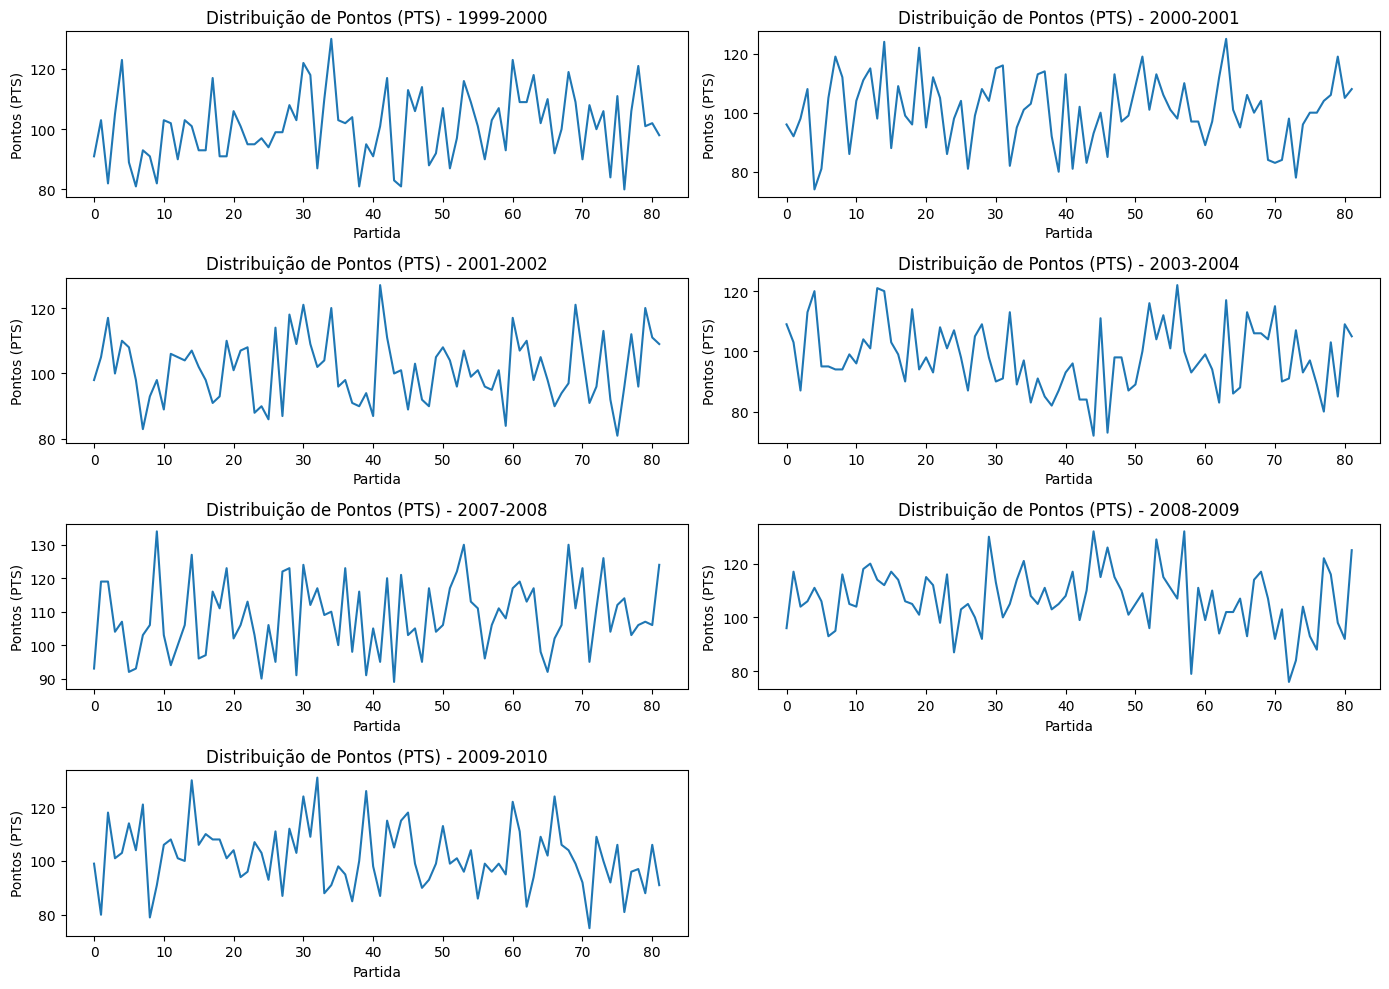

In [27]:
# Distribuição de pontos ao longo de cada temporada
plt.figure(figsize=(14, 10))
for i, (df, title) in enumerate(datasets, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(x=df.index, y=df['PTS'])
    plt.title(f'Distribuição de Pontos (PTS) - {title}')
    plt.xlabel('Partida')
    plt.ylabel('Pontos (PTS)')
    plt.tight_layout()

plt.show()

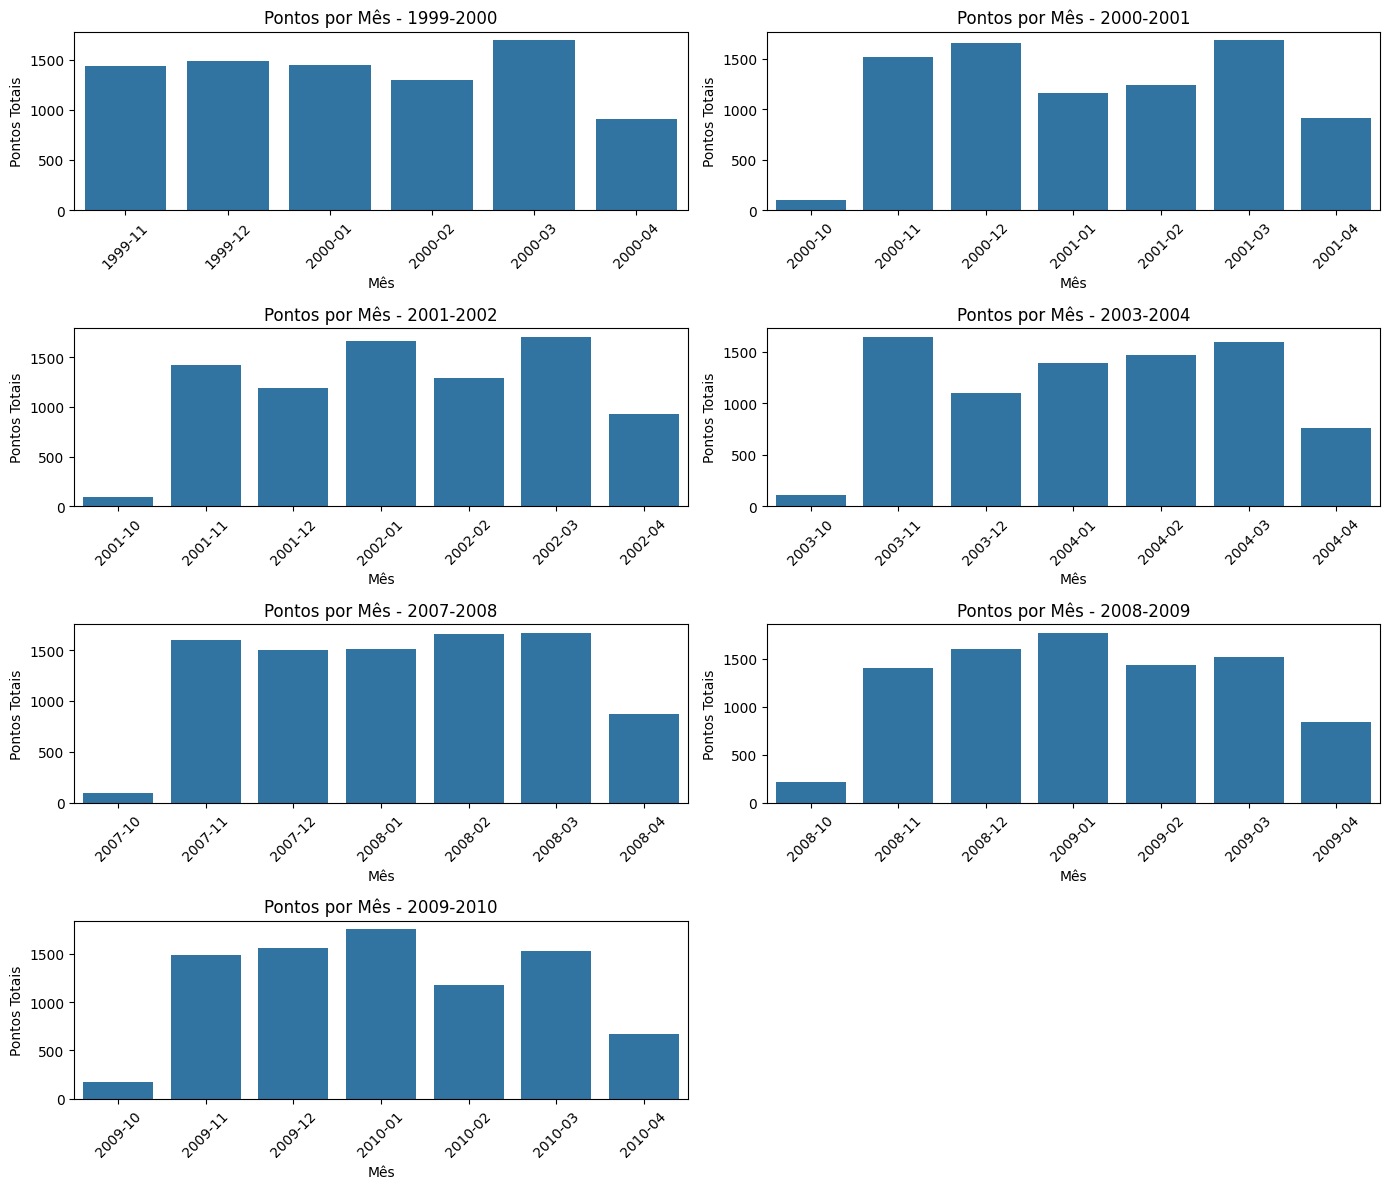

In [29]:
# Quantidade de pontos feitos por mês
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    monthly_points = df.groupby('MONTH')['PTS'].sum()

    plt.subplot(4, 2, i)
    sns.barplot(x=monthly_points.index.astype(str), y=monthly_points.values)
    plt.title(f'Pontos por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Pontos Totais')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Primeiro mês sempre tem menos jogos (um jogo), por isso a diferença com os outros meses

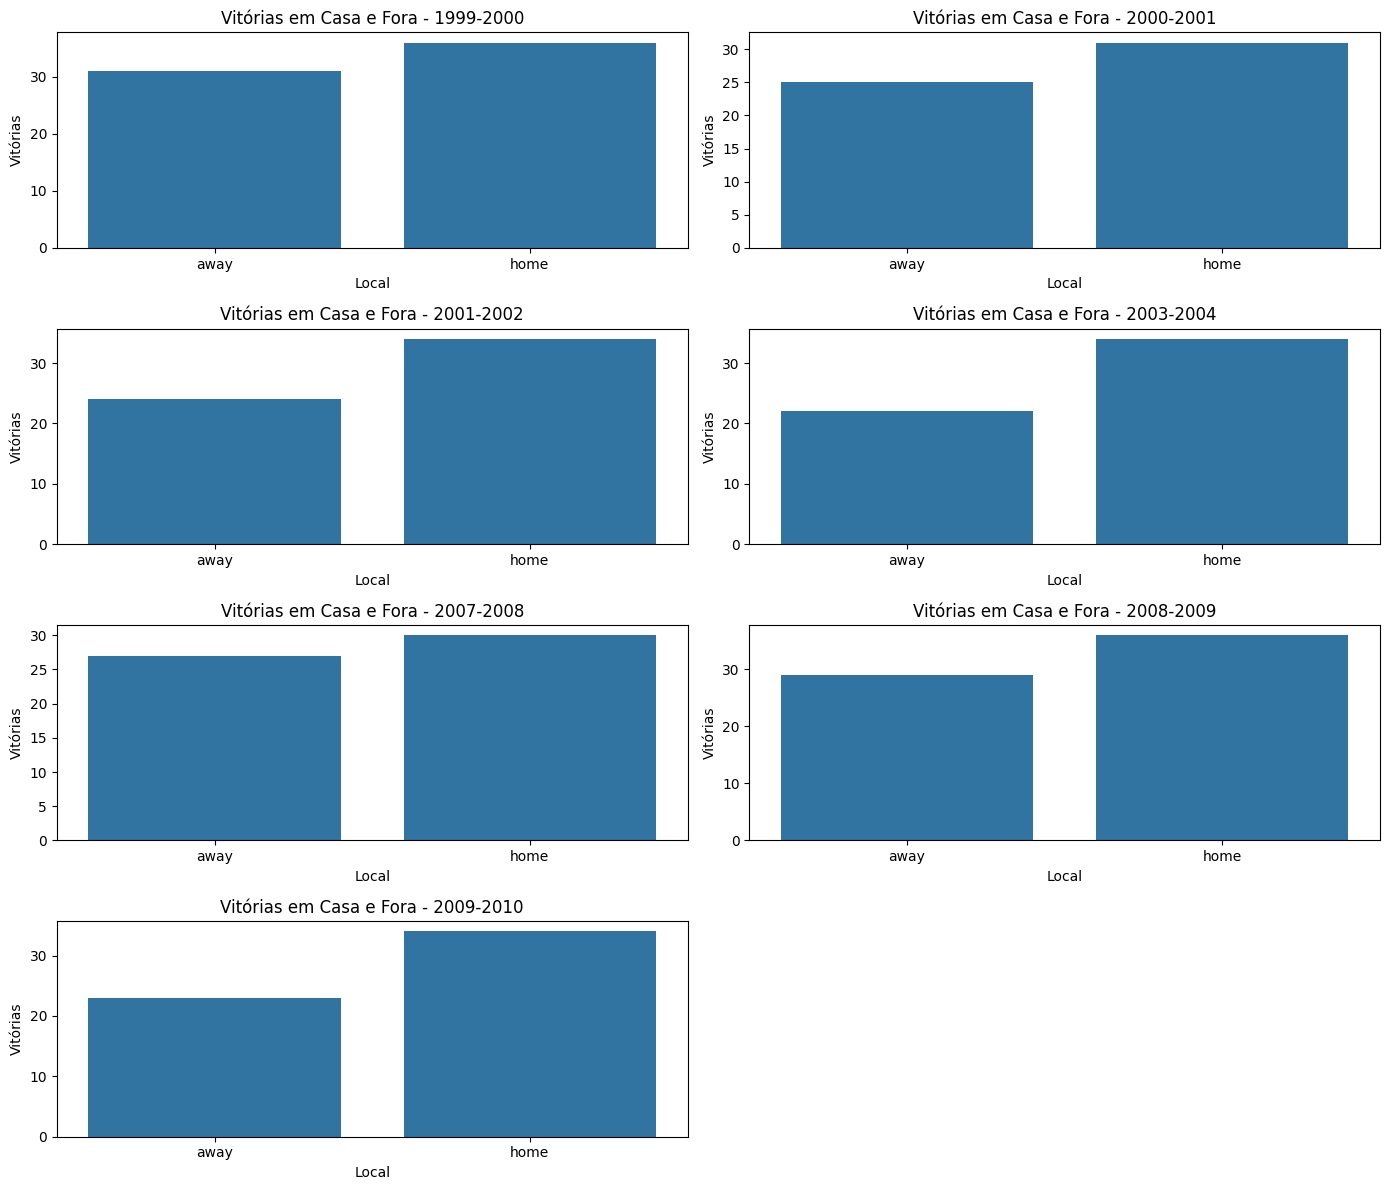

In [30]:
# Quantidade de vitórias jogando em casa e fora de casa
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets, 1):
    # Contar vitórias por local
    wins_home_away = df[df['W_L'] == 1].groupby('HOME_AWAY').size()

    plt.subplot(4, 2, i)
    sns.barplot(x=wins_home_away.index, y=wins_home_away.values)
    plt.title(f'Vitórias em Casa e Fora - {title}')
    plt.xlabel('Local')
    plt.ylabel('Vitórias')
    plt.tight_layout()

plt.show()

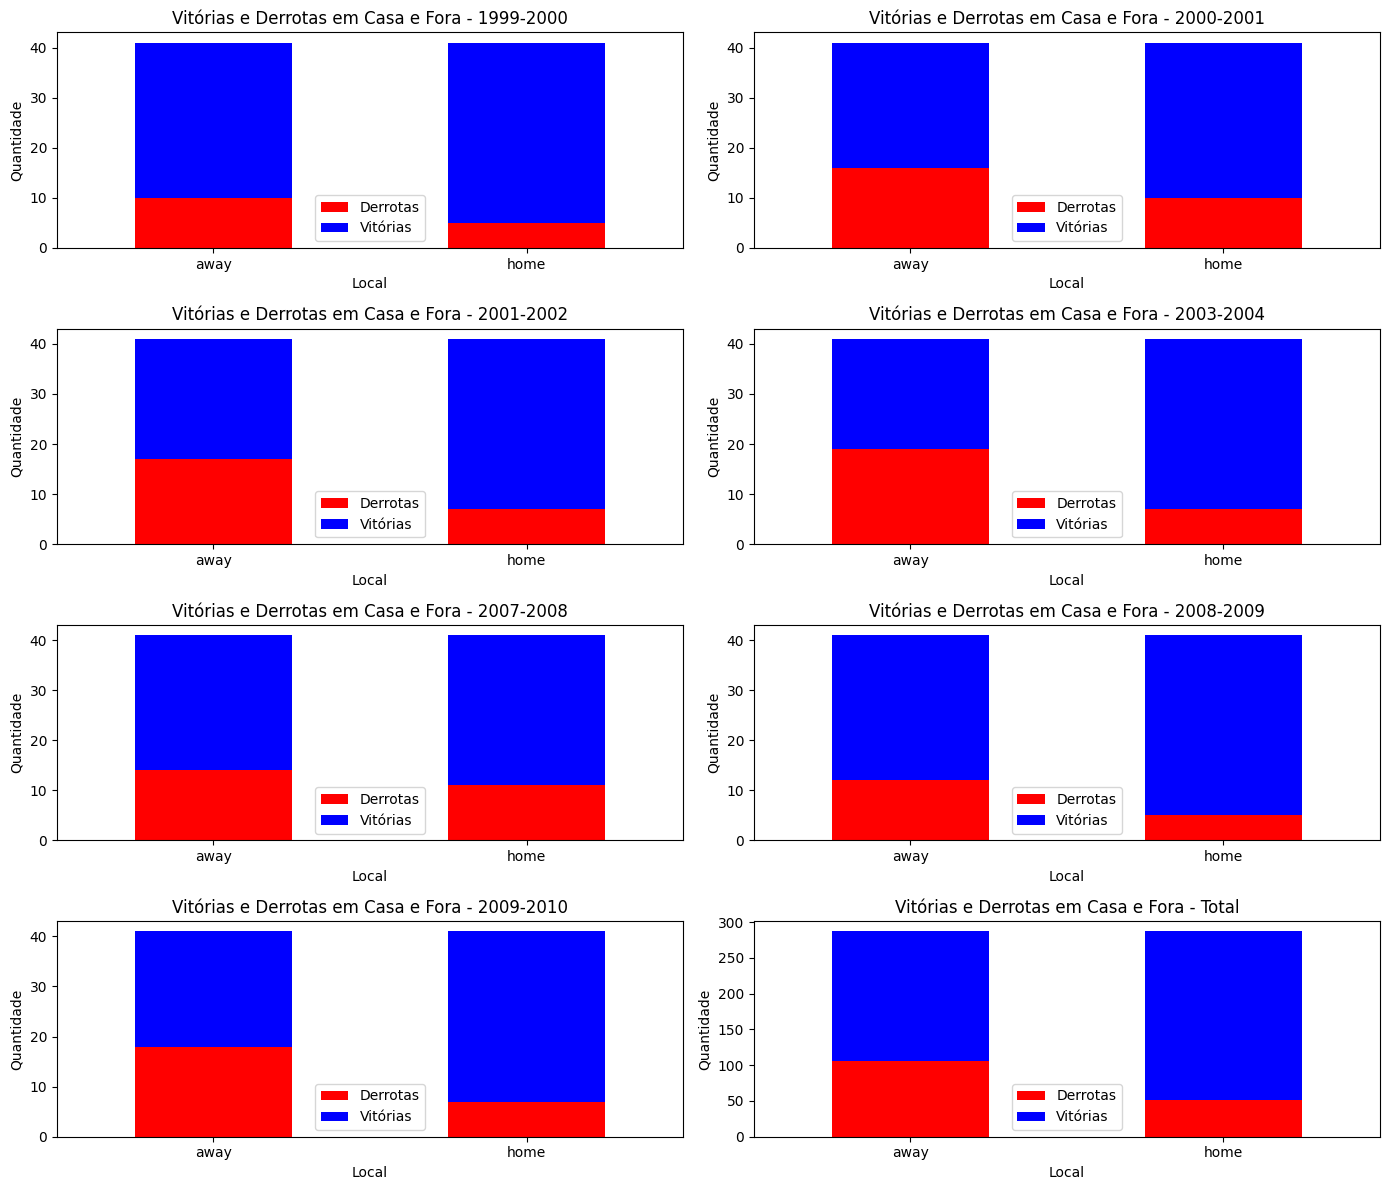

In [31]:
# Vitórias e derrotas dentro e fora de casa
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets_2, 1):
    # Contar vitórias e derrotas por local
    results_home_away = df.groupby(['HOME_AWAY', 'W_L']).size().unstack().fillna(0)
    results_home_away.columns = ['Derrotas', 'Vitórias']

    plt.subplot(4, 2, i)
    results_home_away.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())
    plt.title(f'Vitórias e Derrotas em Casa e Fora - {title}')
    plt.xlabel('Local')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()

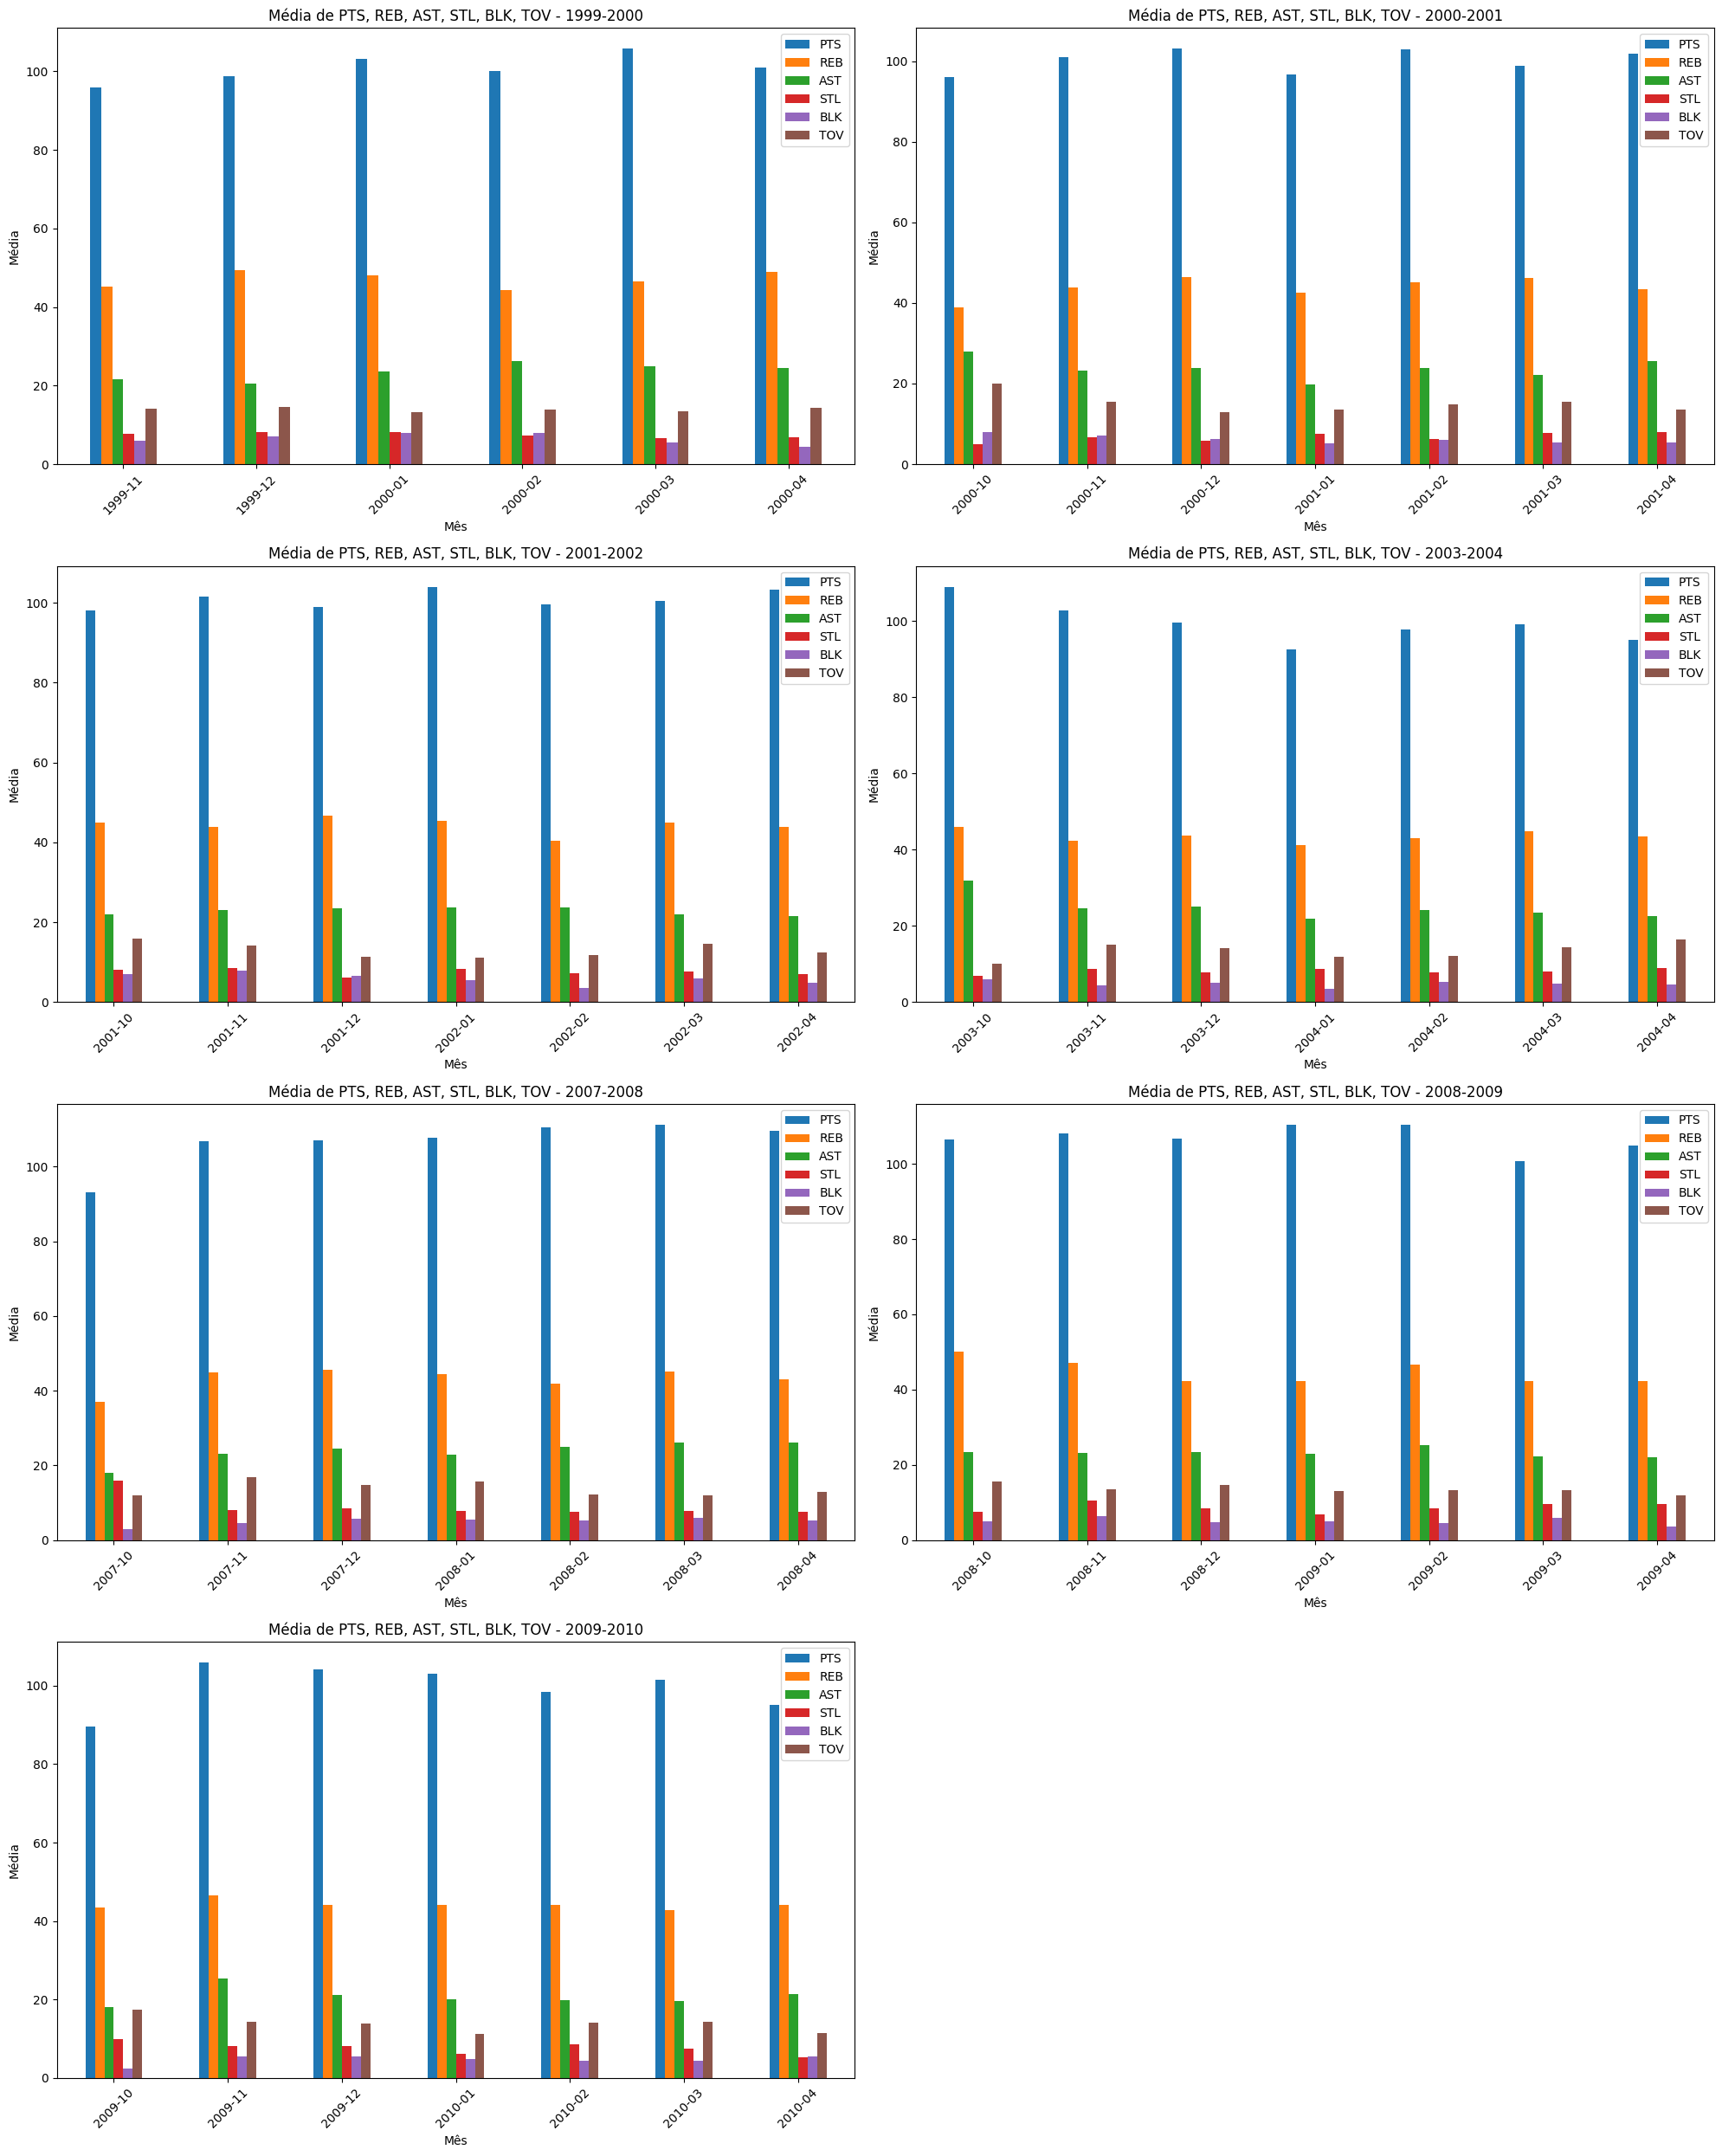

In [32]:
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    monthly_means = df.groupby('MONTH')[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV']].mean()
    
    plt.subplot(4, 2, i)
    monthly_means.plot(kind='bar', ax=plt.gca())
    plt.title(f'Média de PTS, REB, AST, STL, BLK, TOV - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Média')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

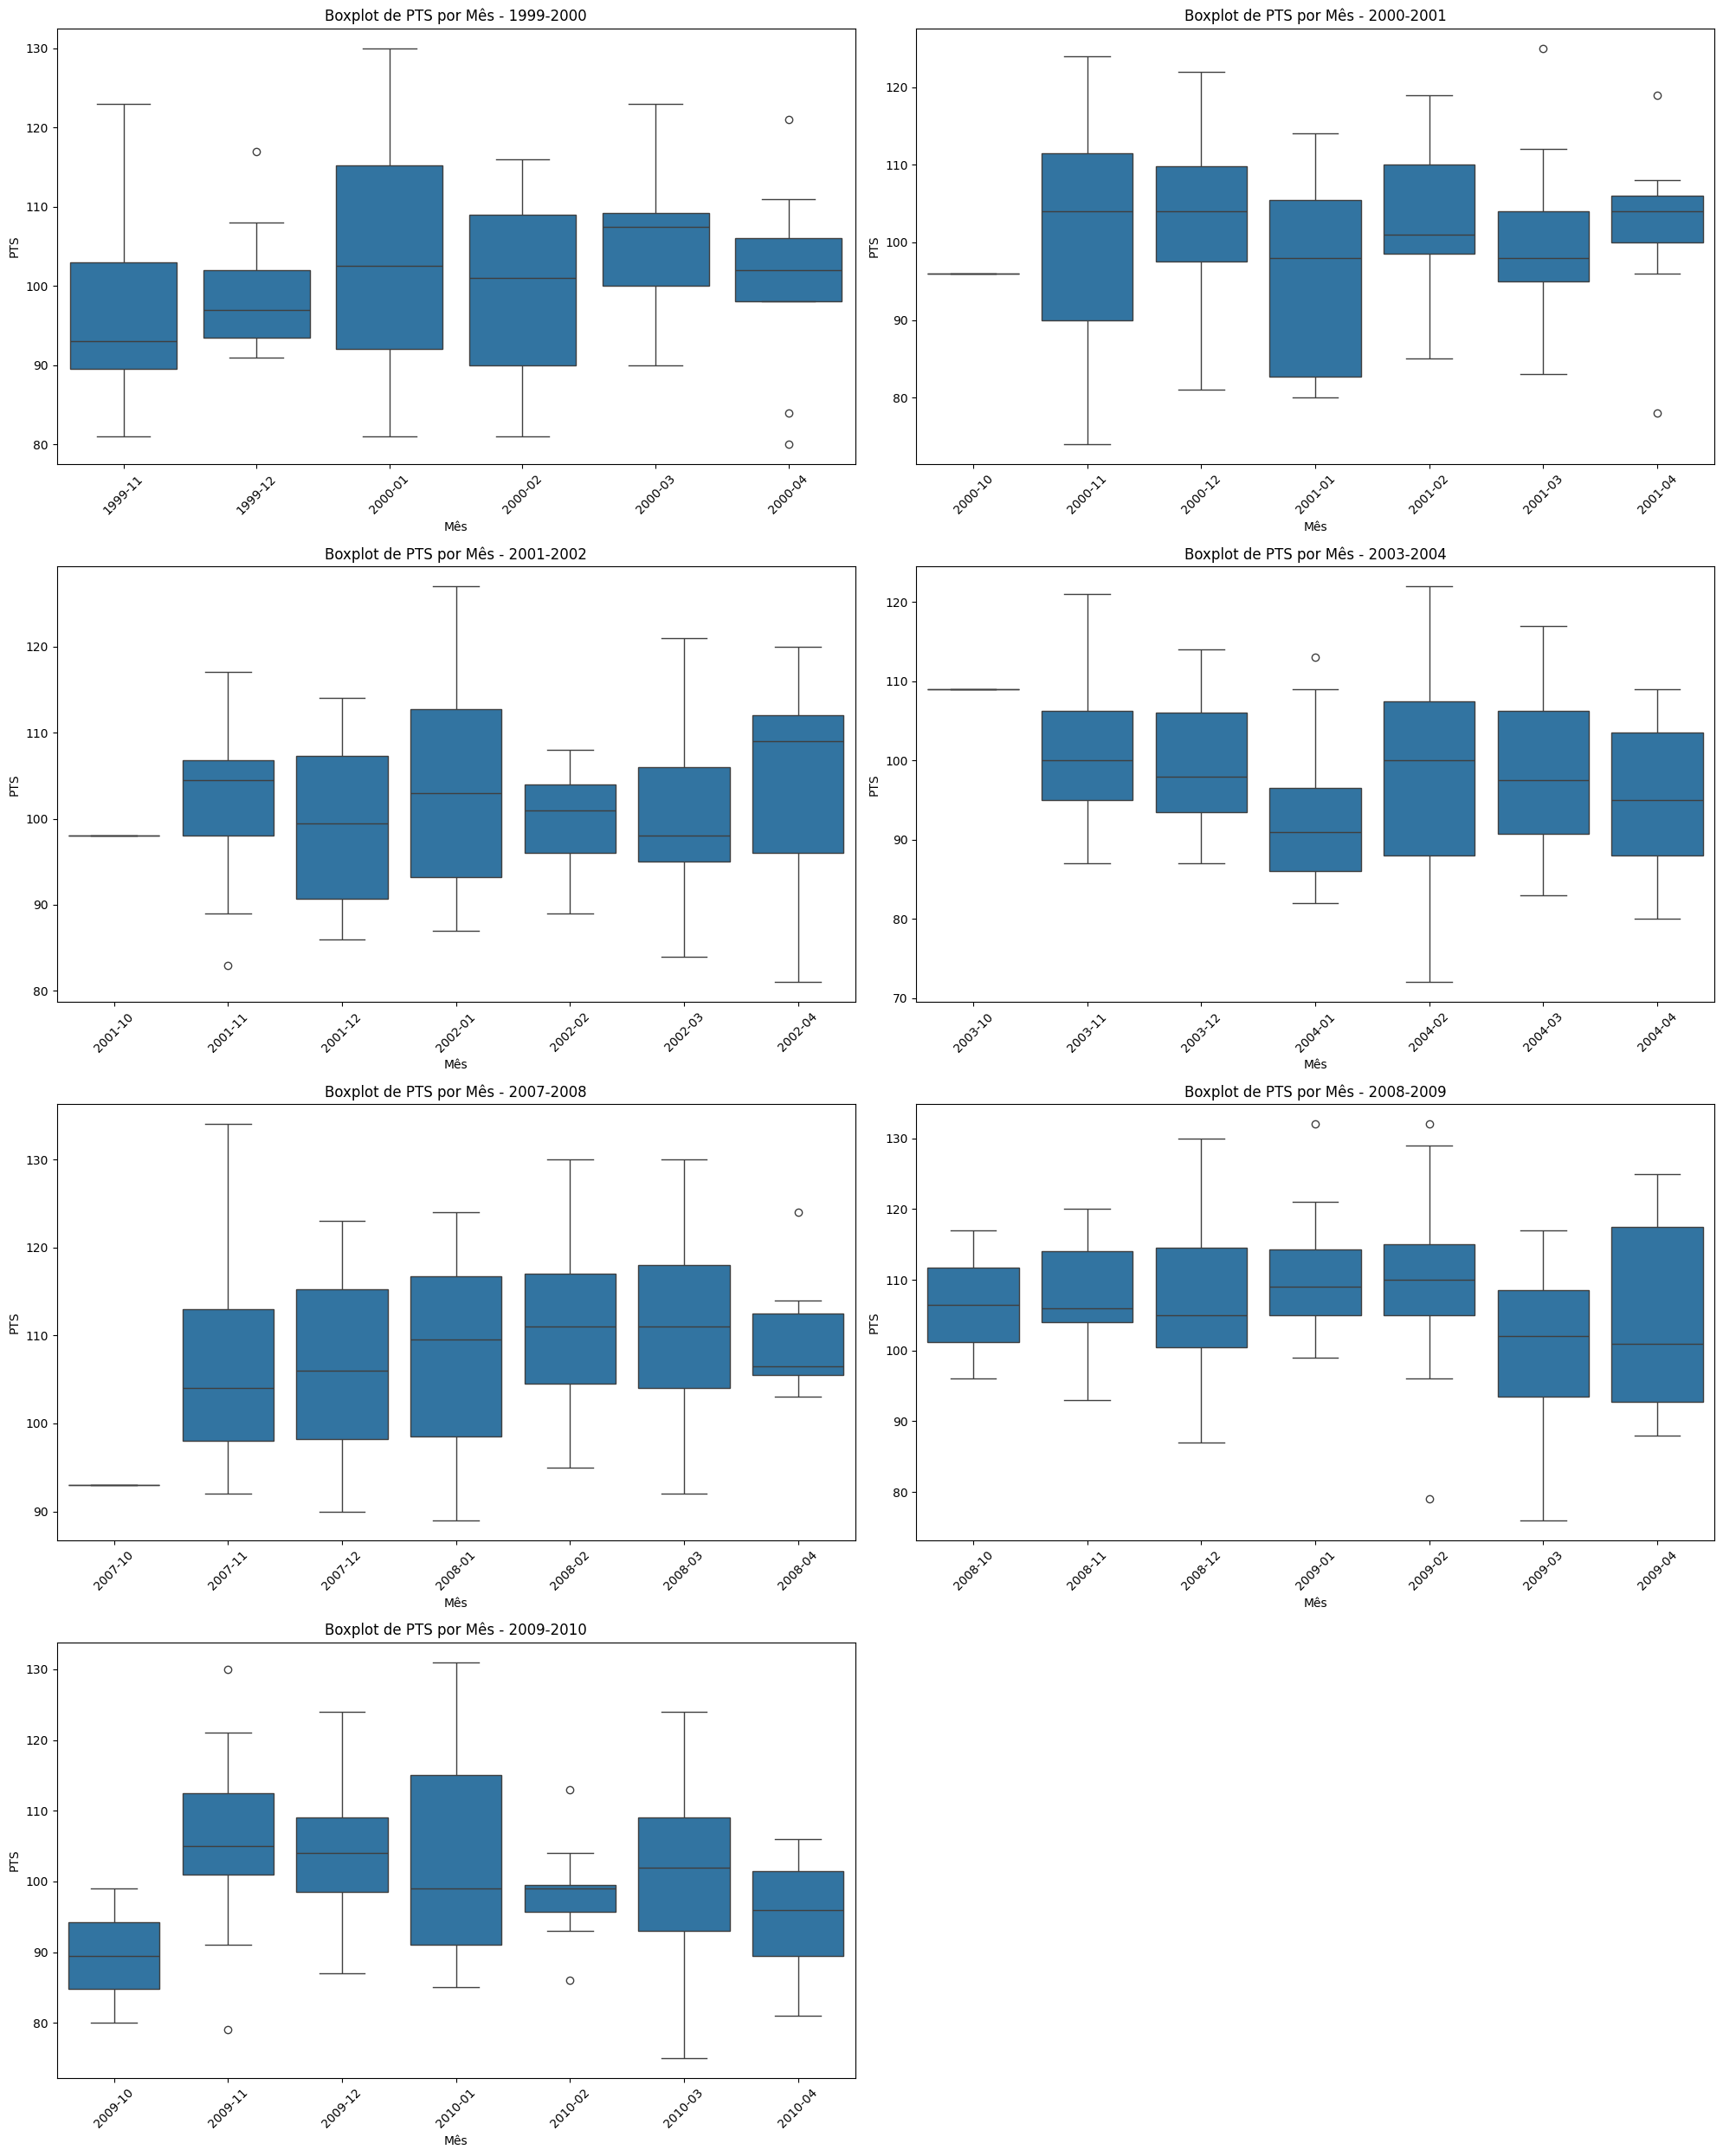

In [33]:
# Boxplot para PTS, REB, AST, STL, BLK, TOV por mês
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='MONTH', y='PTS')
    plt.title(f'Boxplot de PTS por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('PTS')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


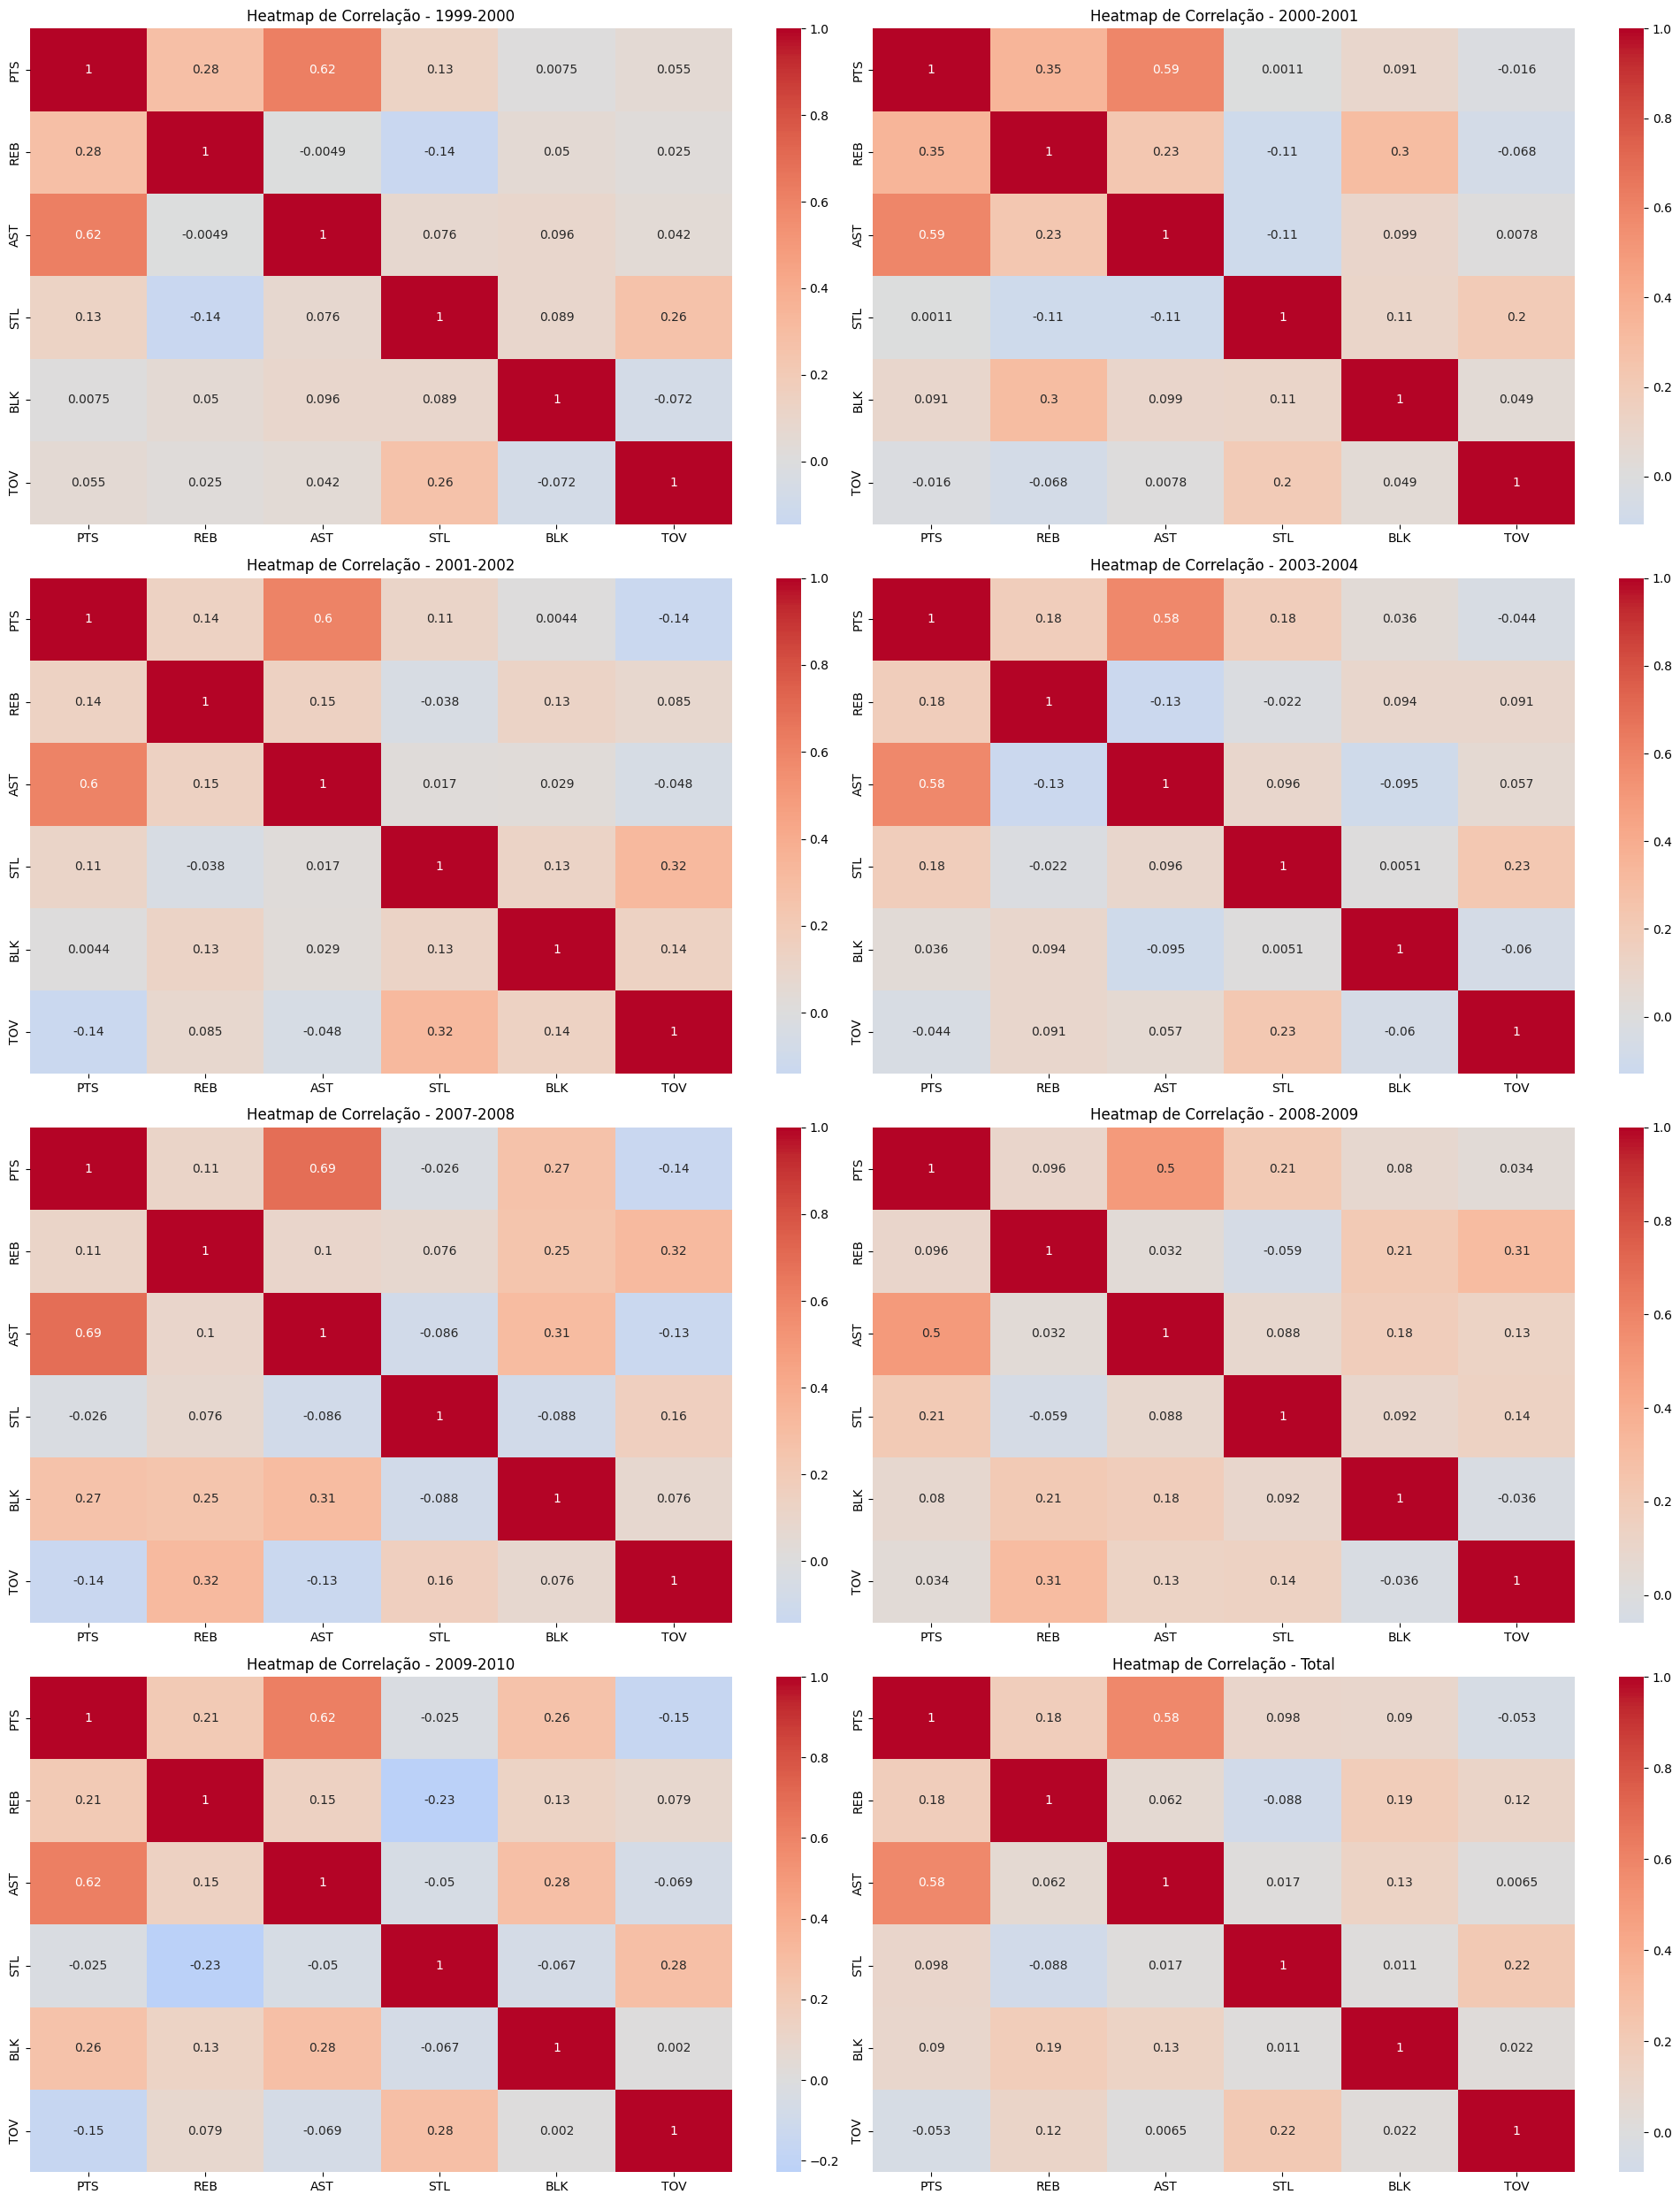

In [34]:
# Heatmap de correlação para PTS, REB, AST, STL, BLK, TOV
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    correlation = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV']].corr()
    
    plt.subplot(4, 2, i)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Heatmap de Correlação - {title}')
    plt.tight_layout()

plt.show()


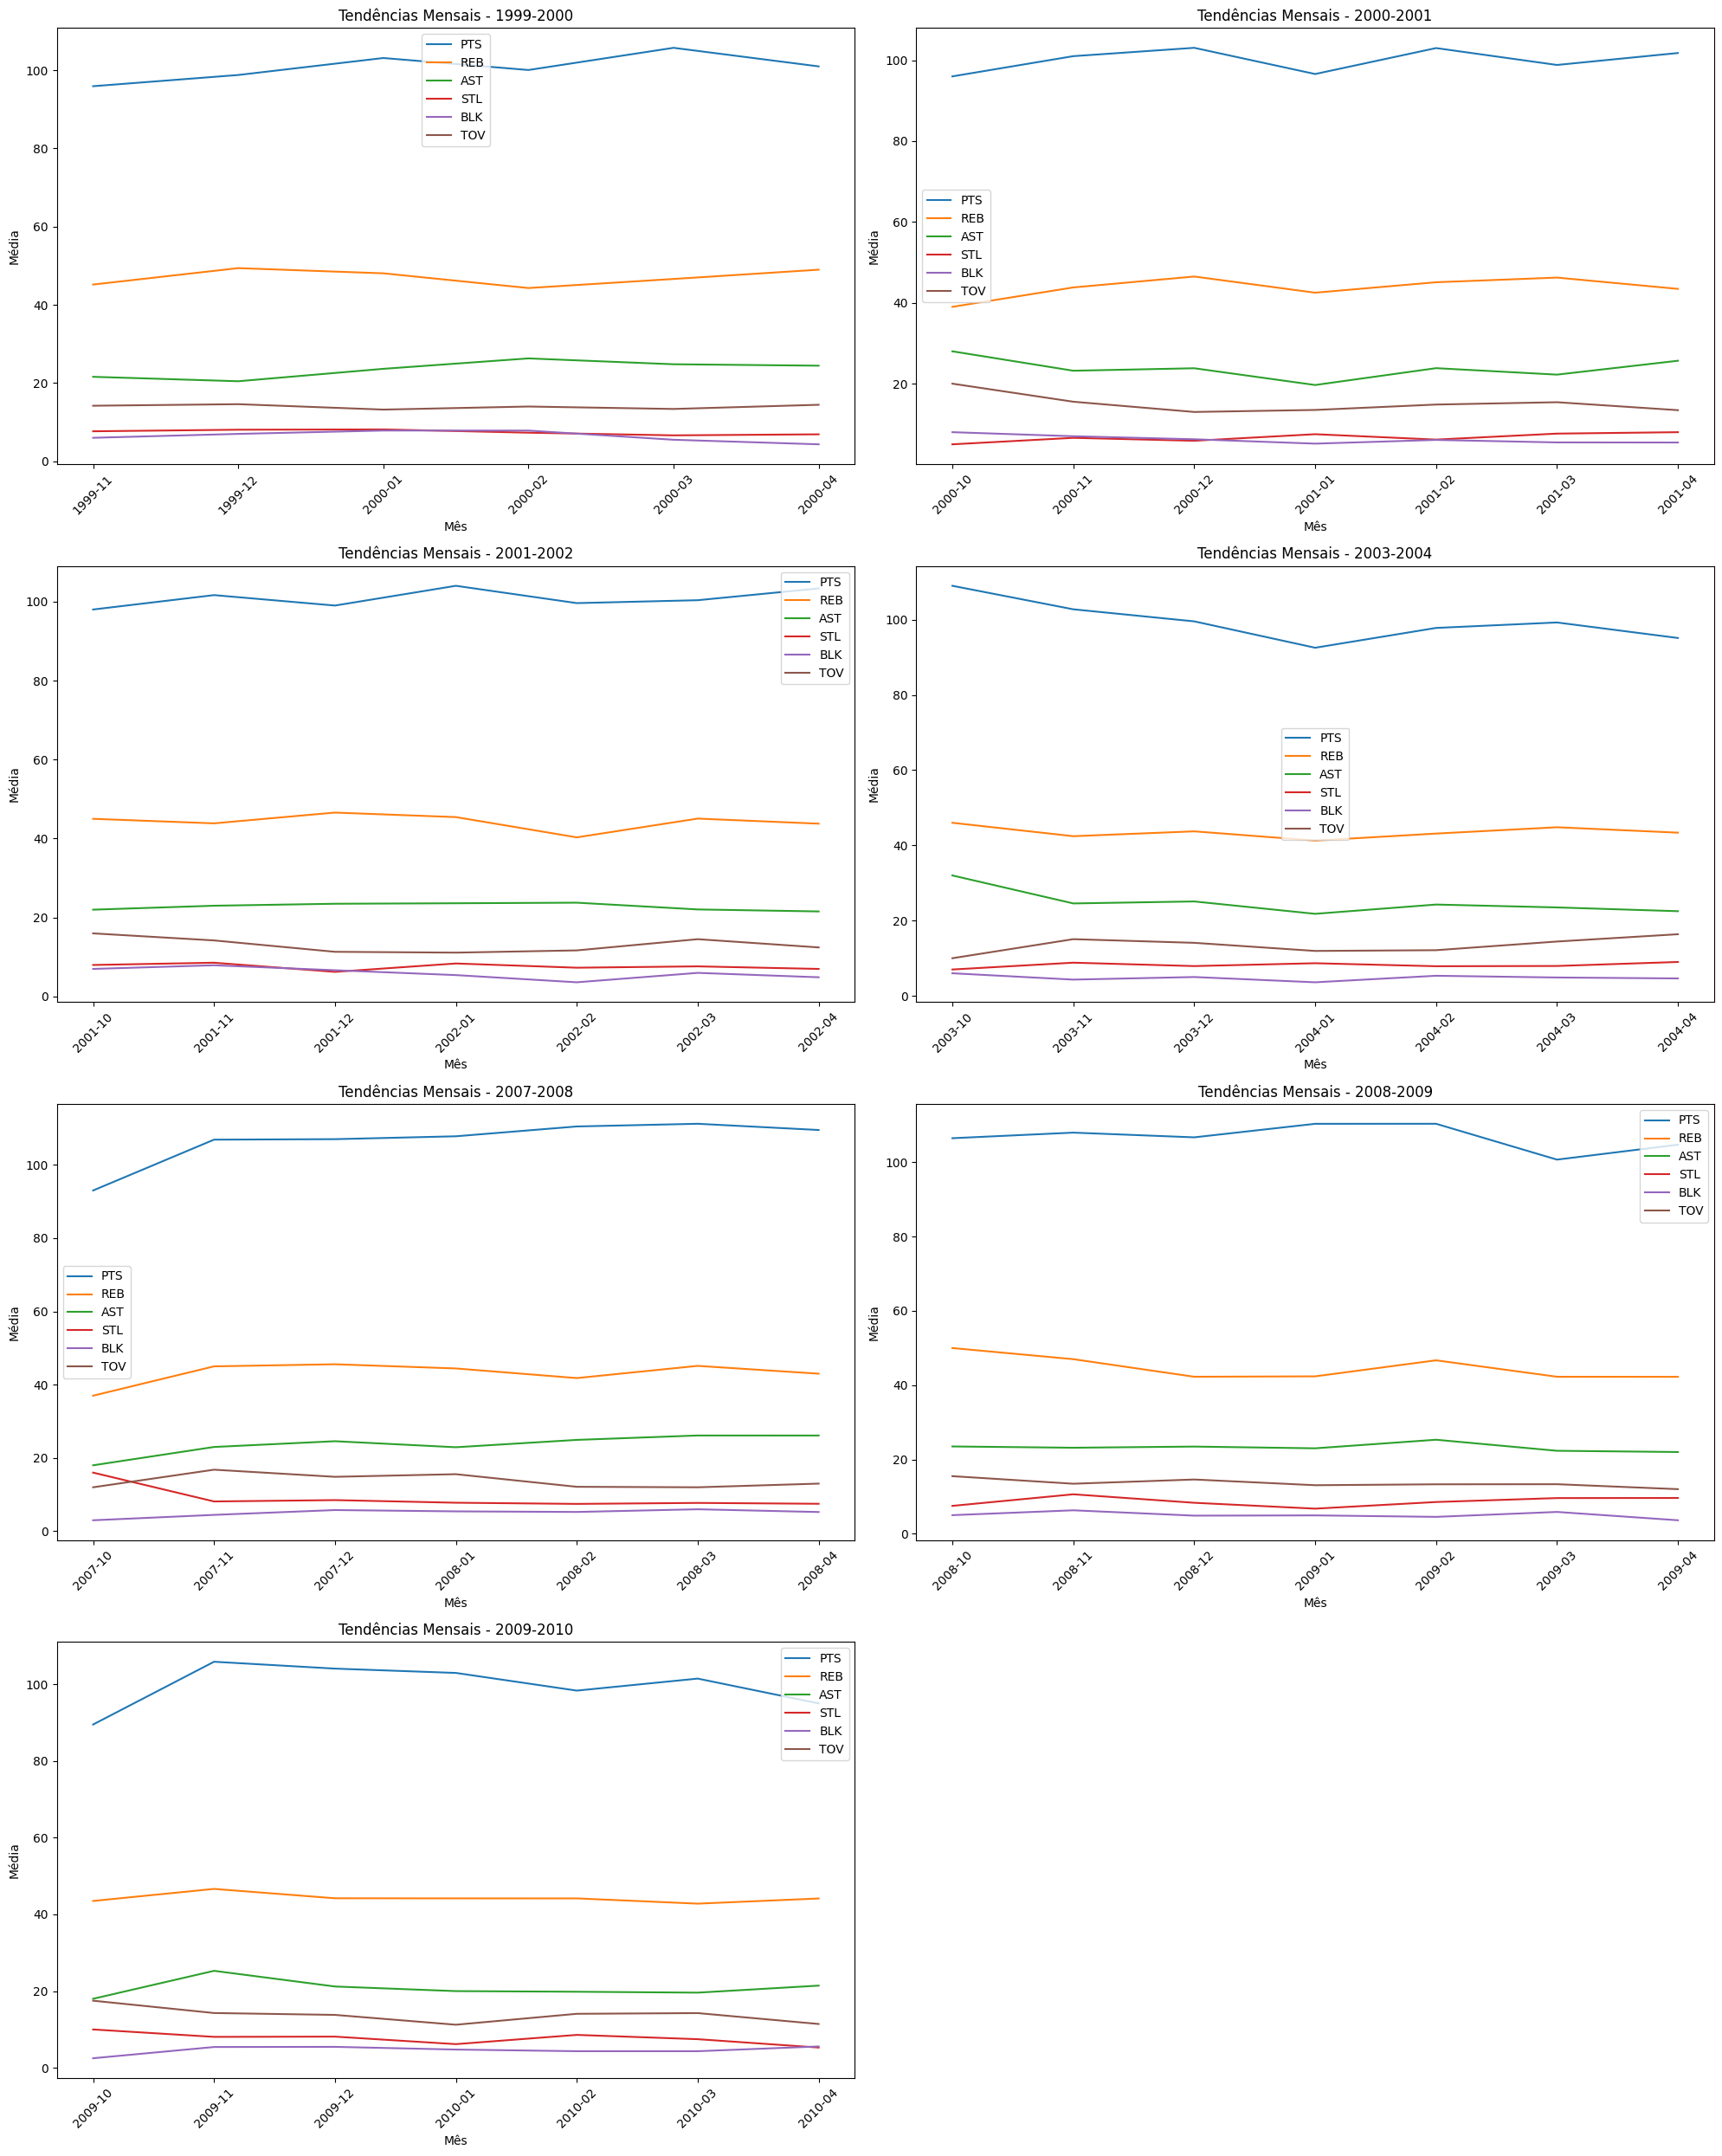

In [35]:
# Gráfico de tendência para PTS, REB, AST, STL, BLK, TOV por mês
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    monthly_means = df.groupby('MONTH')[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV']].mean()
    
    plt.subplot(4, 2, i)
    for column in monthly_means.columns:
        sns.lineplot(data=monthly_means, x=monthly_means.index.astype(str), y=column, label=column)
    plt.title(f'Tendências Mensais - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Média')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


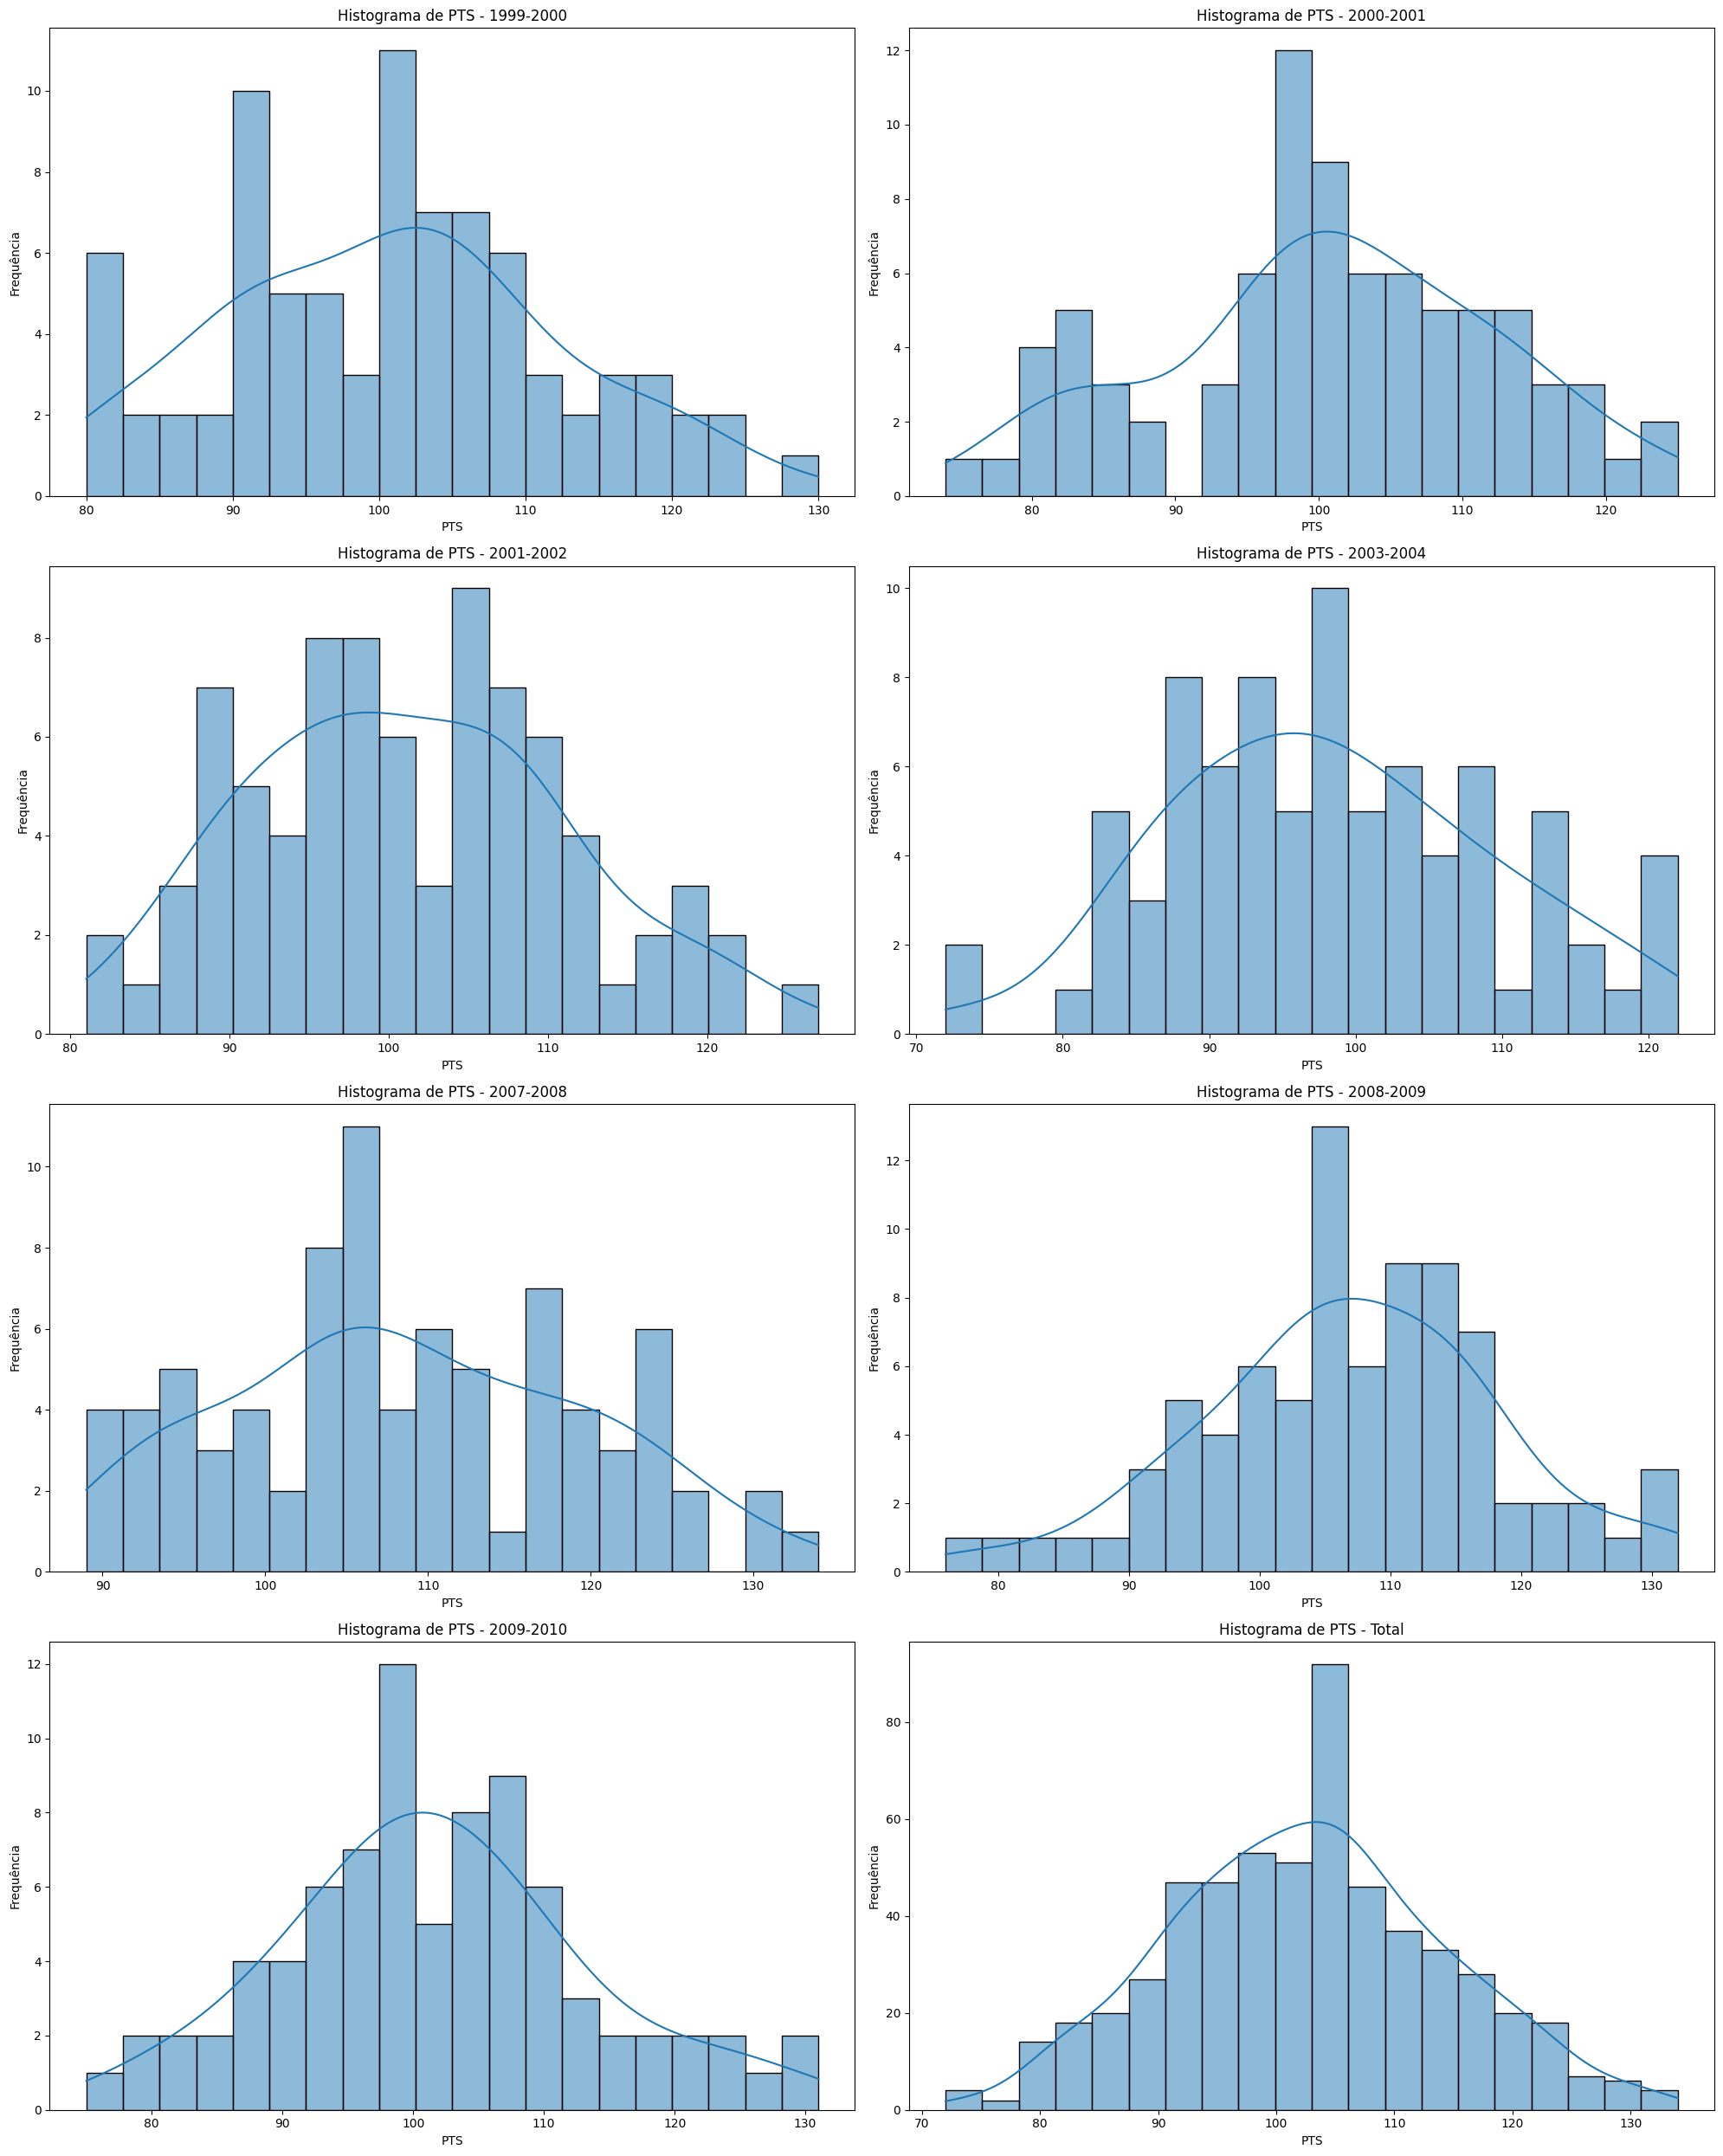

In [36]:
# Histograma da distribuição de PTS
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df['PTS'], bins=20, kde=True)
    plt.title(f'Histograma de PTS - {title}')
    plt.xlabel('PTS')
    plt.ylabel('Frequência')
    plt.tight_layout()

plt.show()


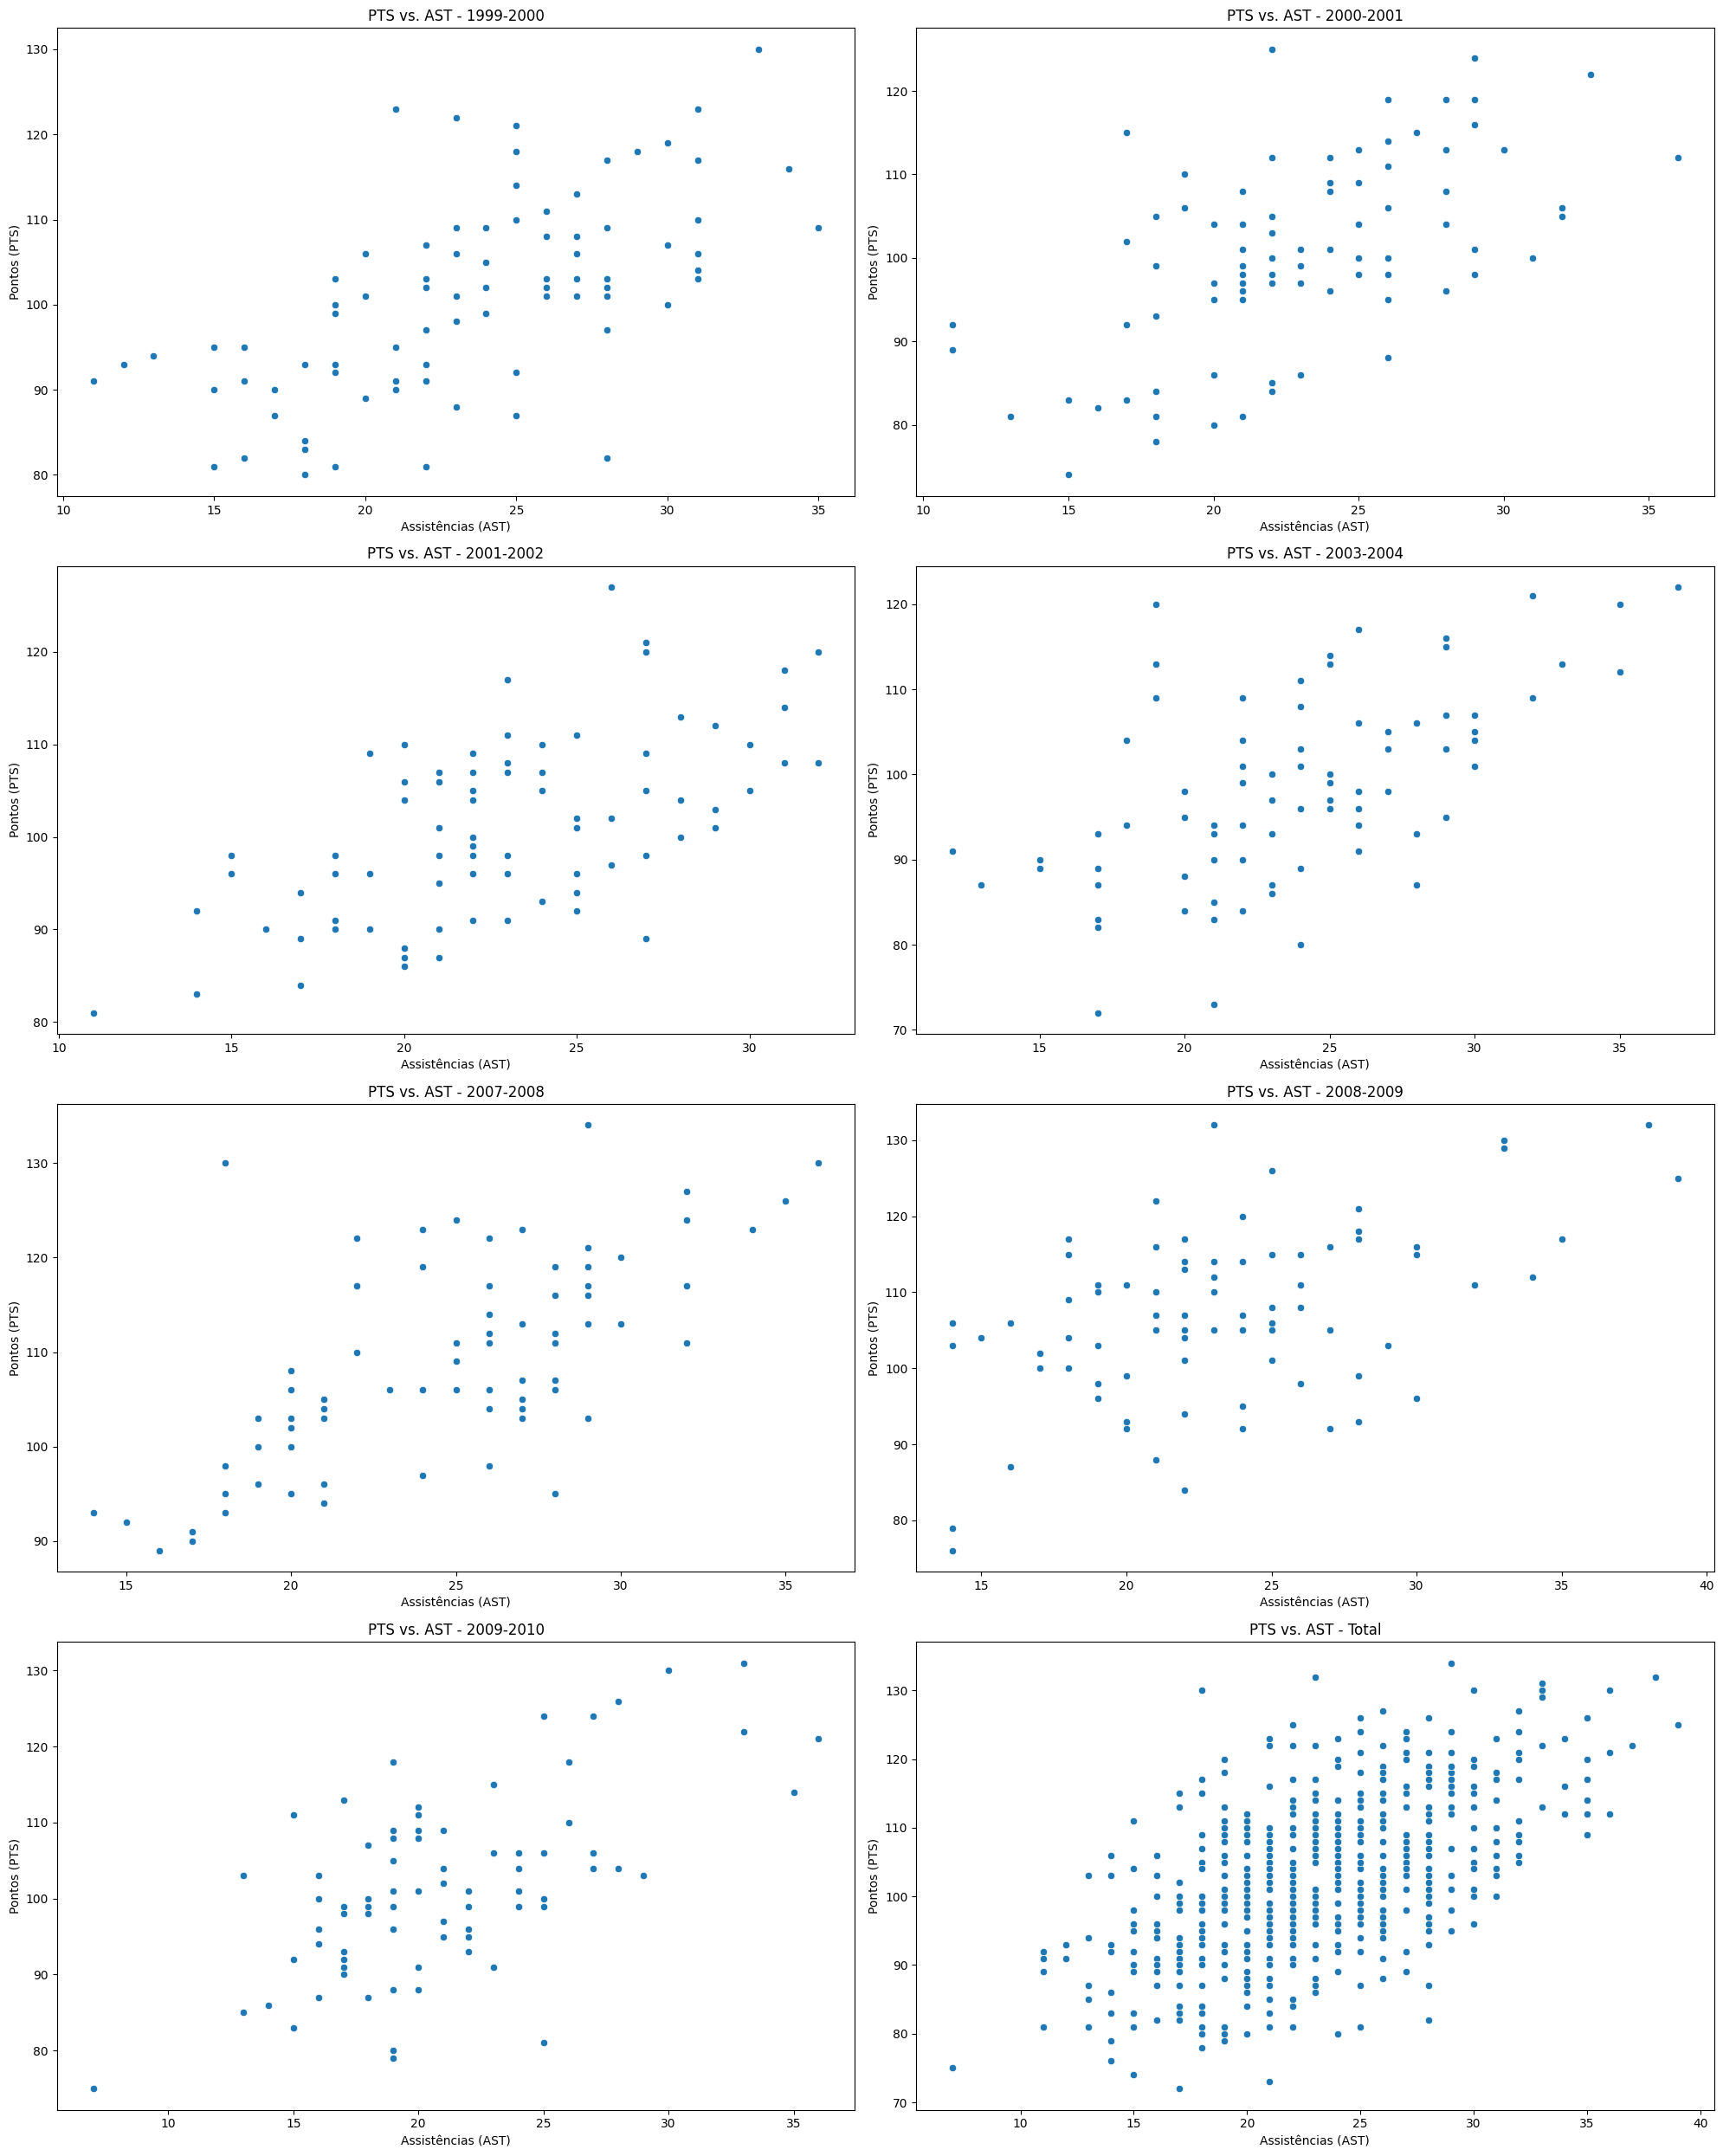

In [37]:
# Scatter plot de PTS vs. AST
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=df, x='AST', y='PTS')
    plt.title(f'PTS vs. AST - {title}')
    plt.xlabel('Assistências (AST)')
    plt.ylabel('Pontos (PTS)')
    plt.tight_layout()

plt.show()


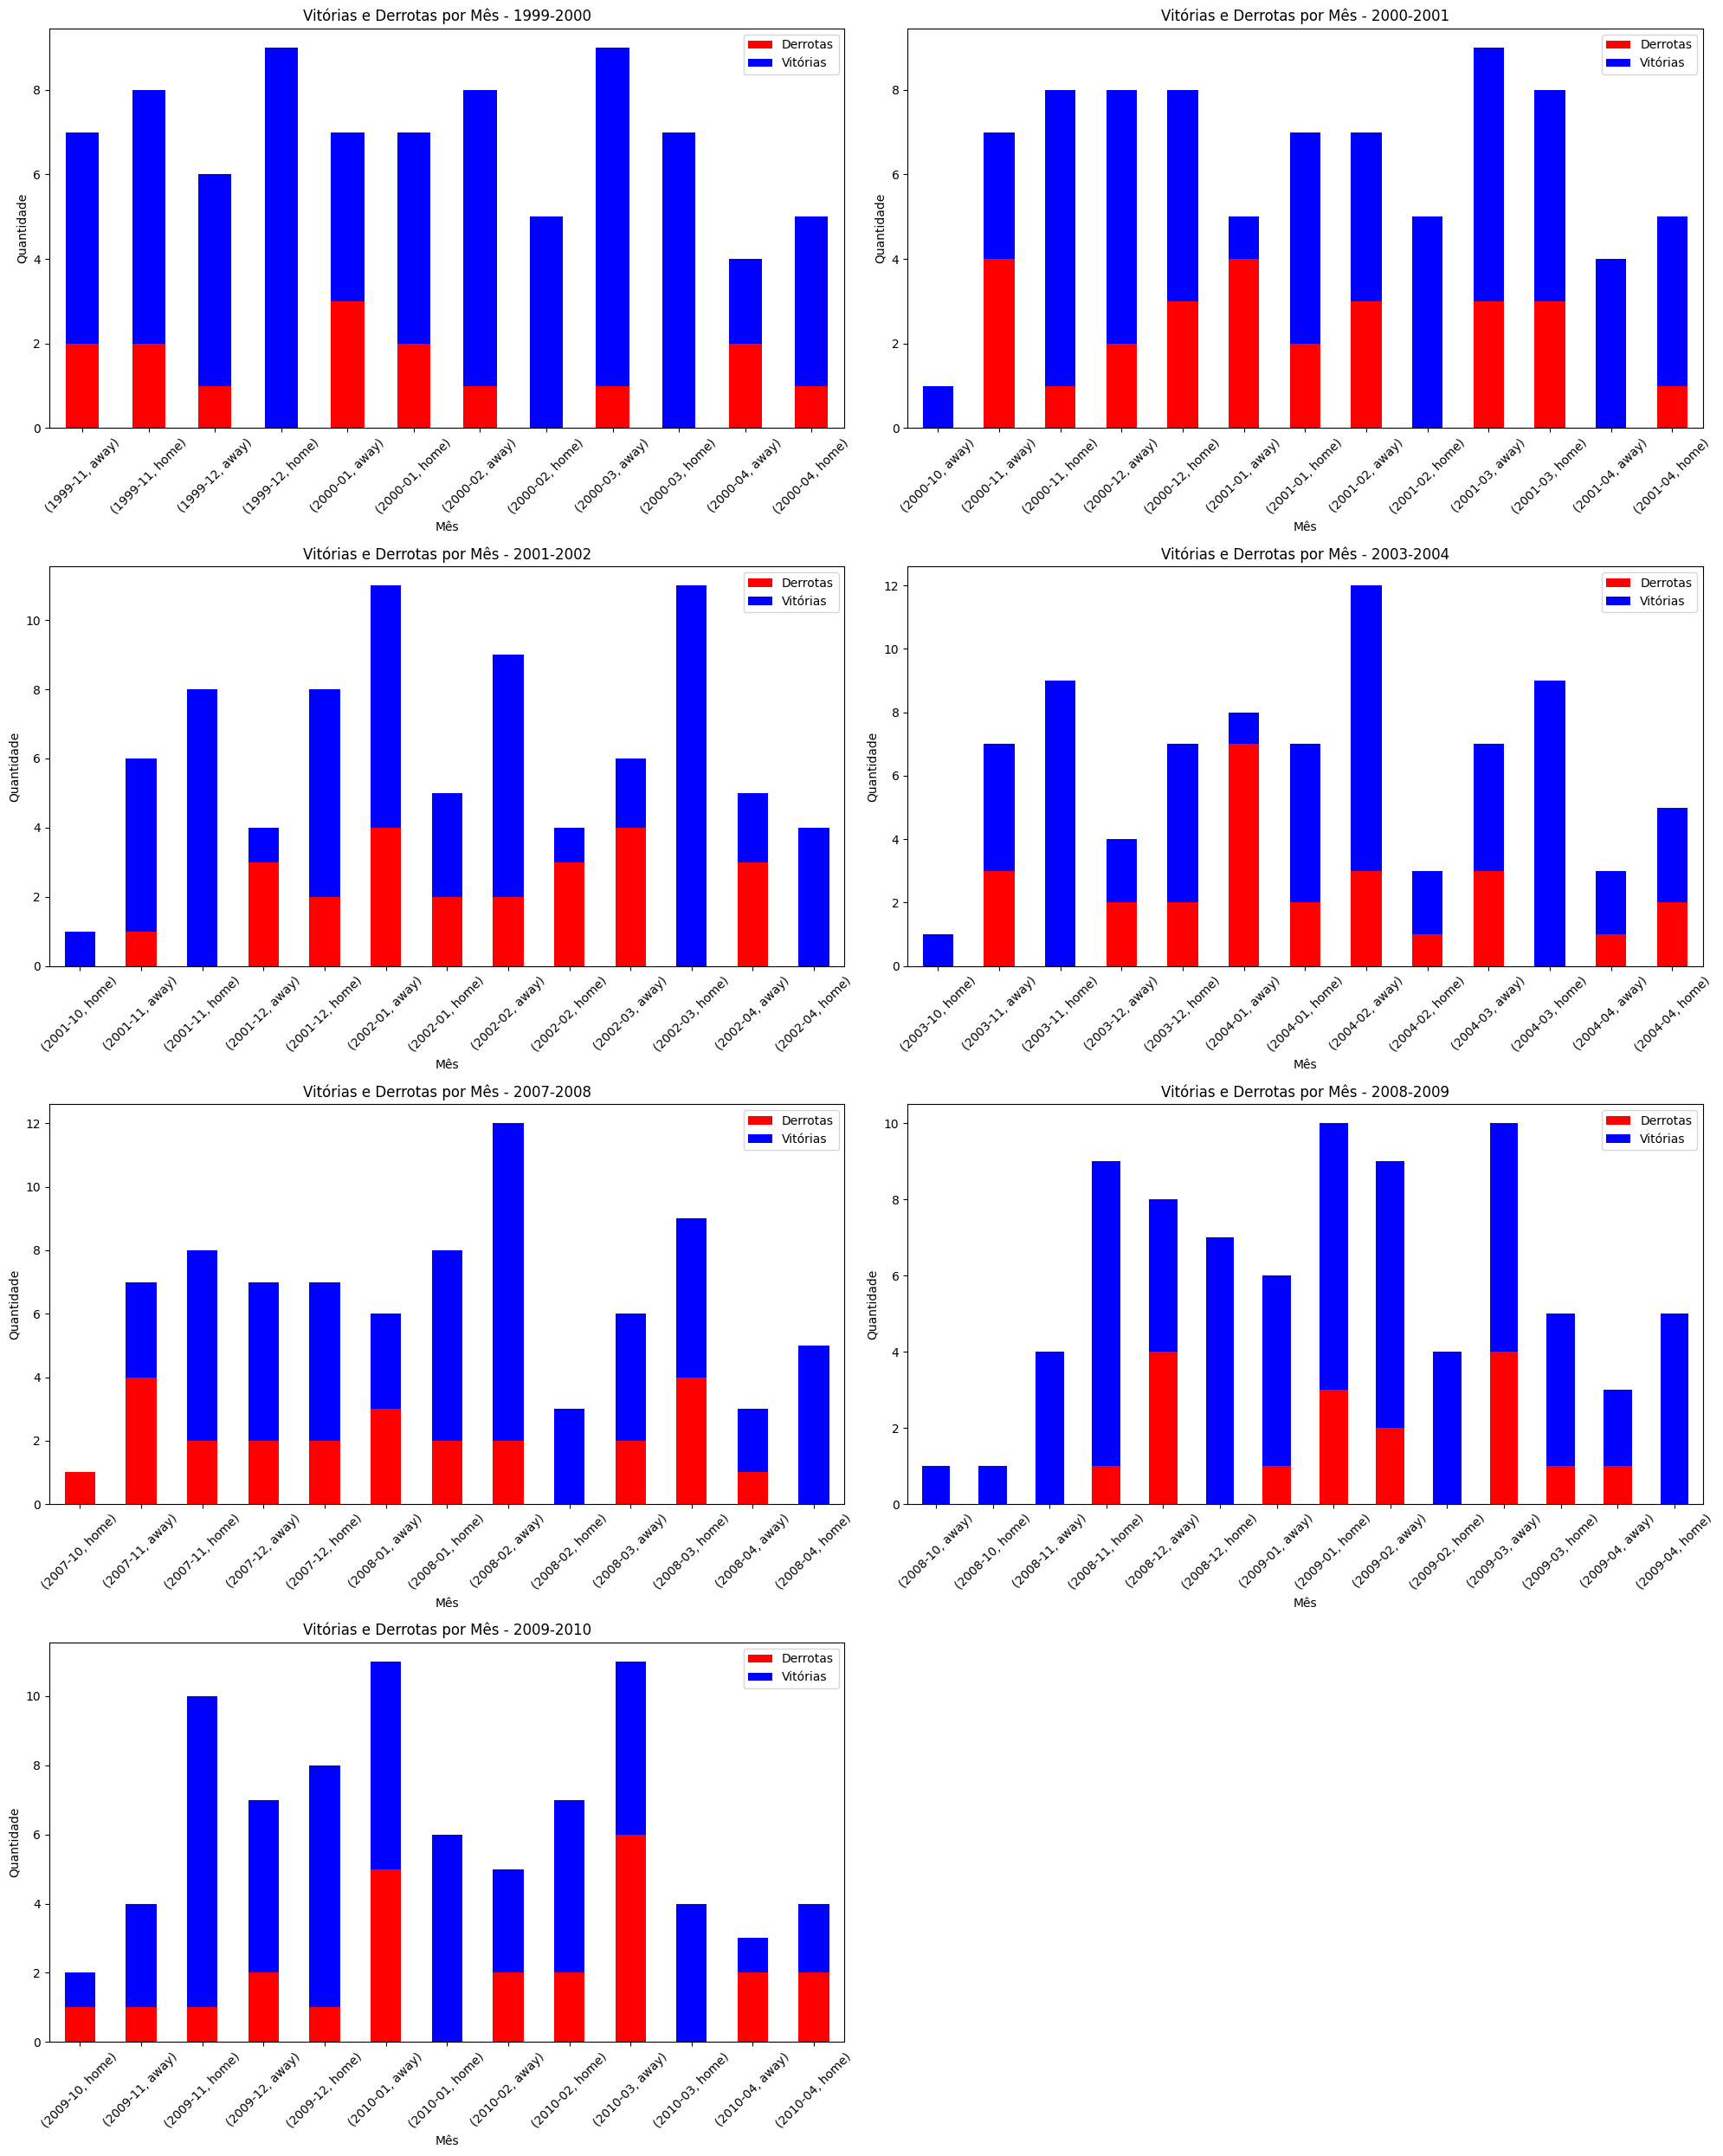

In [39]:
# Gráfico de Barras Empilhadas para vitórias e derrotas por mês
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    results_by_month = df.groupby(['MONTH', 'HOME_AWAY', 'W_L']).size().unstack(fill_value=0)
    results_by_month.columns = ['Derrotas', 'Vitórias']

    plt.subplot(4, 2, i)
    results_by_month.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())
    plt.title(f'Vitórias e Derrotas por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


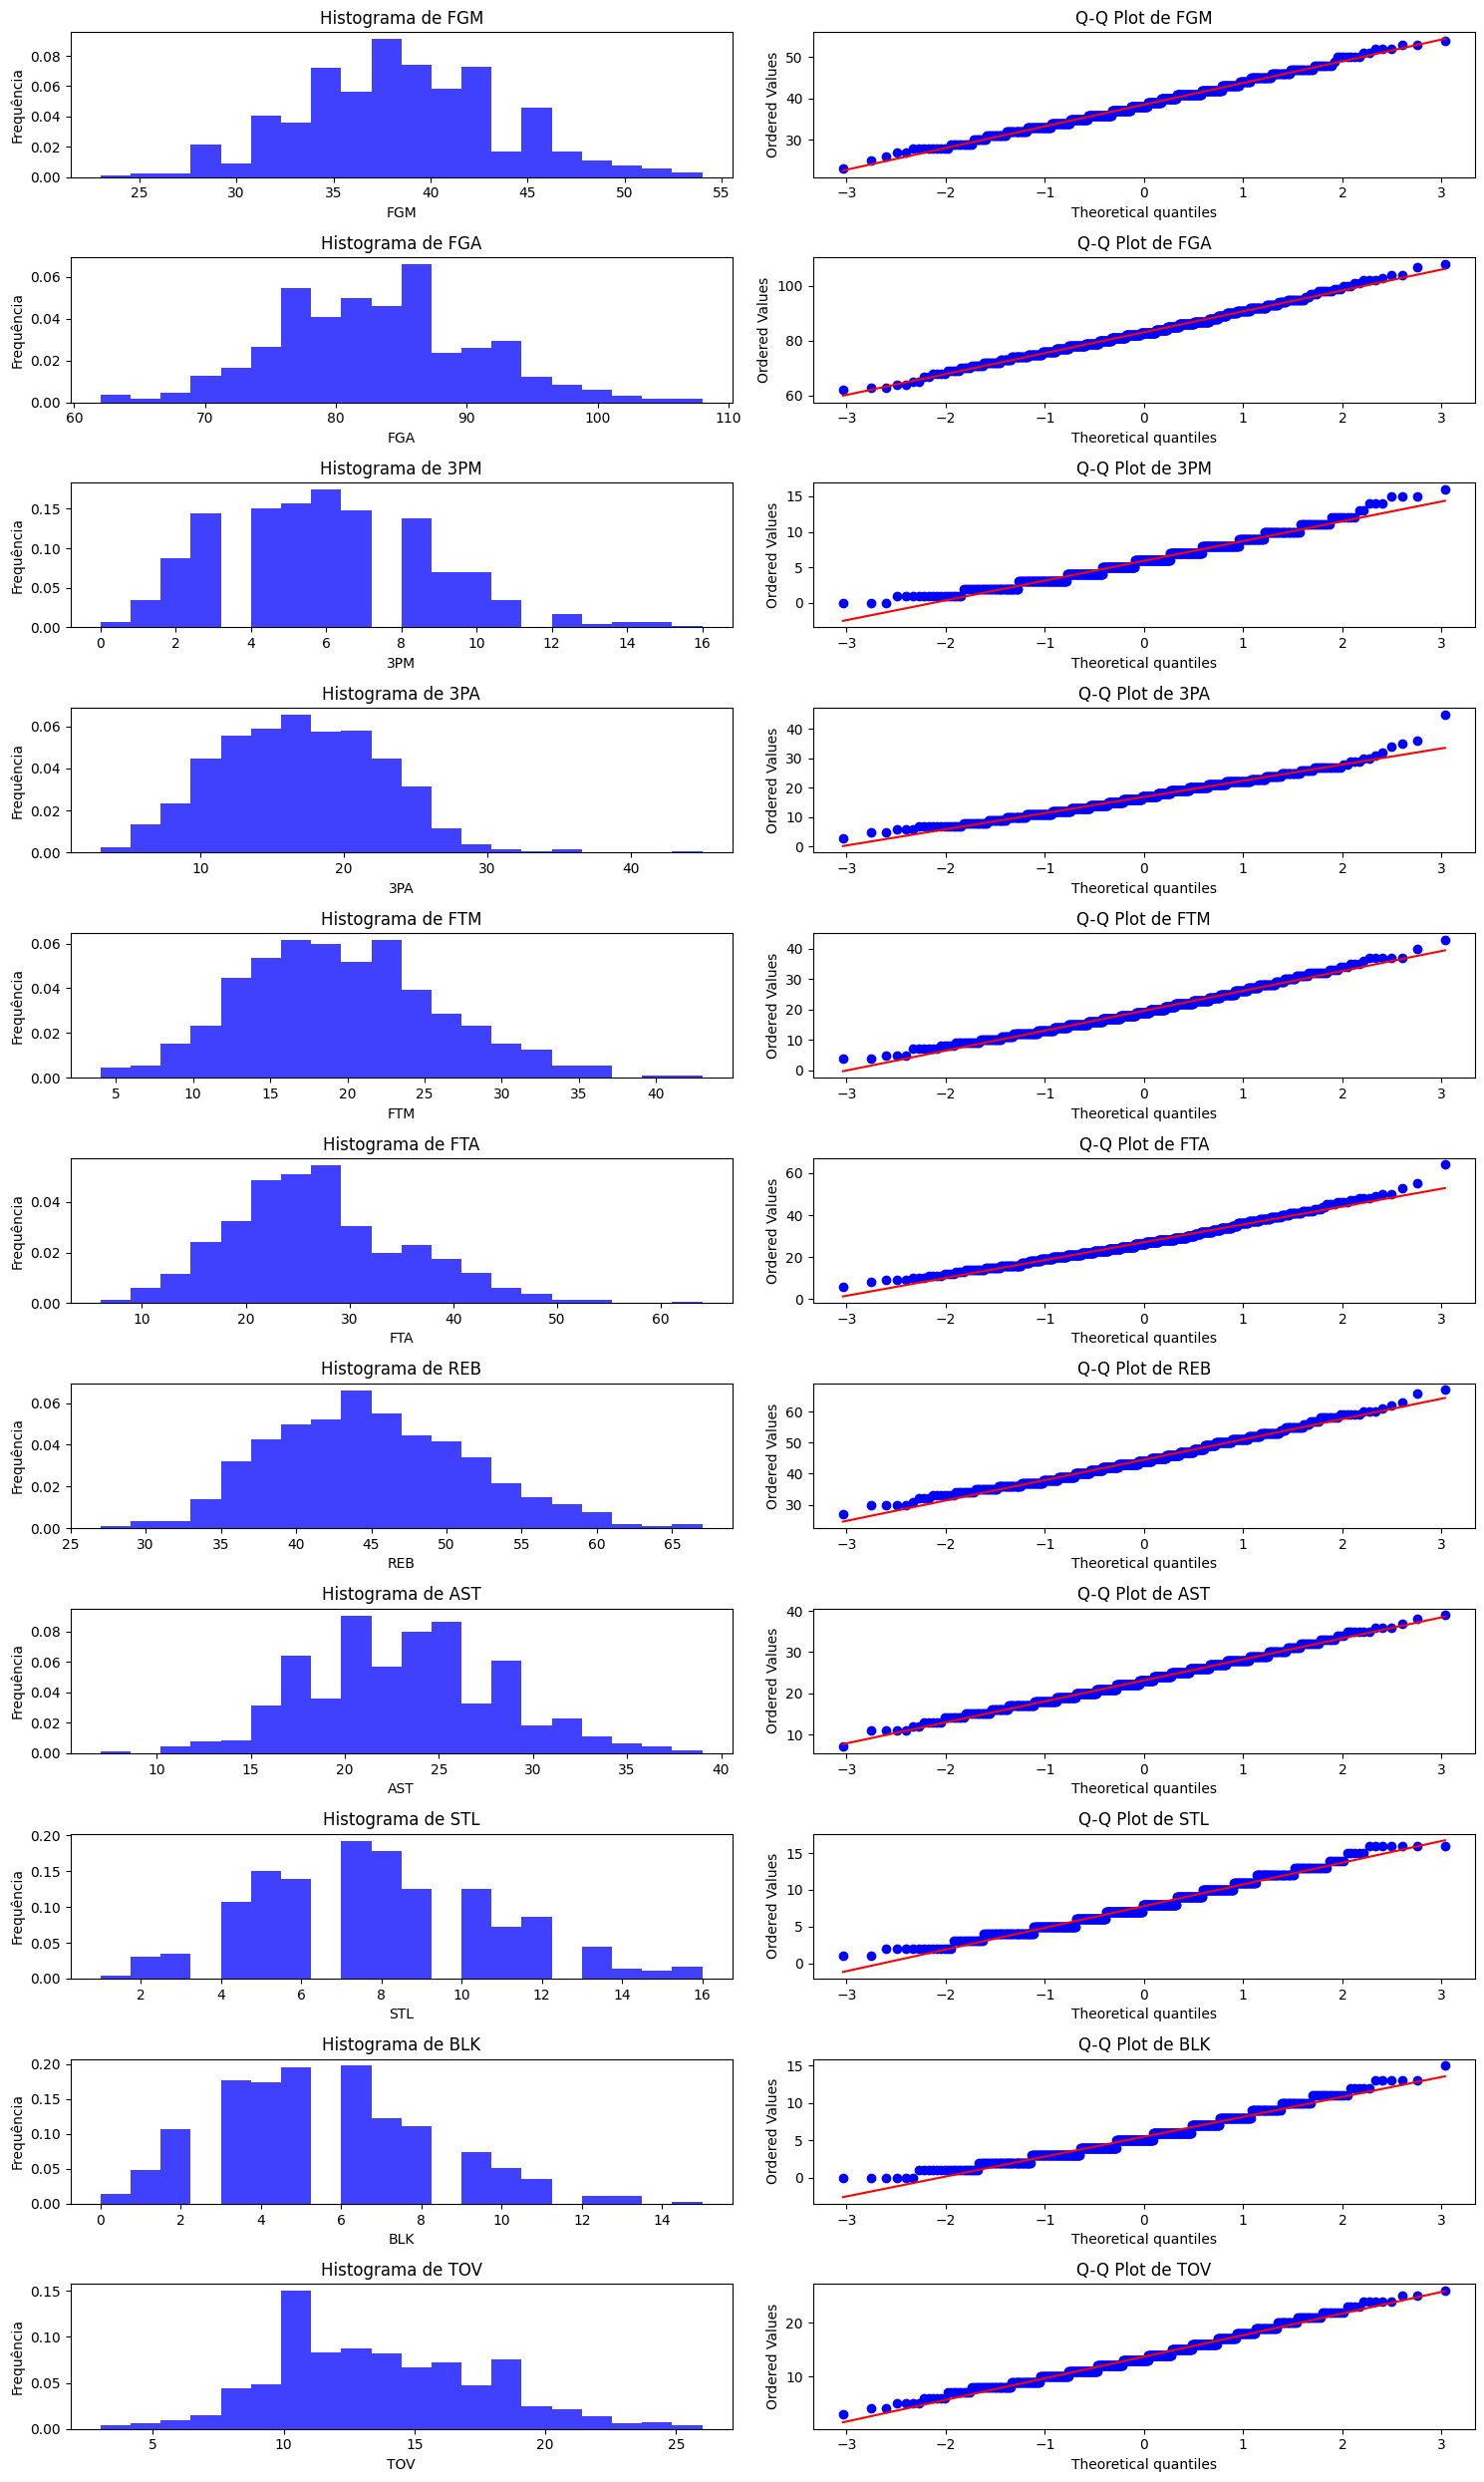

In [40]:
# Estatísticas a serem analisadas
estatisticas = ['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Configurações para subplot
num_rows = len(estatisticas)
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 25))

# Loop sobre as estatísticas
for i, estatistica in enumerate(estatisticas):
    # Dados da estatística ao longo da temporada
    data = lakers_merged[estatistica]
    
    # Histograma
    axs[i, 0].hist(data, bins=20, density=True, alpha=0.75, color='b')
    axs[i, 0].set_title(f'Histograma de {estatistica}')
    axs[i, 0].set_xlabel(estatistica)
    axs[i, 0].set_ylabel('Frequência')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q Plot de {estatistica}')

# Ajustar layout
plt.tight_layout()
plt.show()


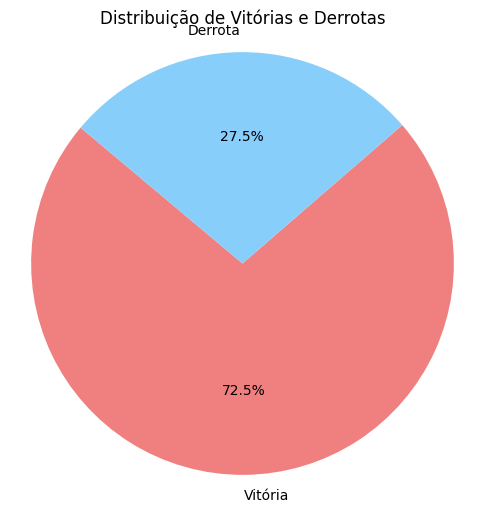

In [41]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = lakers_merged['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


In [43]:
# Estatísticas a serem calculadas
estatisticas = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Calcular o total de uma estatística
def calcular_total(dataset, estatistica):
    return dataset[estatistica].sum()

# Calcular o total para cada estatística em cada temporada
totals_07_08 = {estatistica: calcular_total(lakers_07_08, estatistica) for estatistica in estatisticas}
totals_09_10 = {estatistica: calcular_total(lakers_09_10, estatistica) for estatistica in estatisticas}

# Totais
print("Totais da Temporada 2007-2008:")
for estatistica, total in totals_07_08.items():
    print(f"{estatistica}: {total}")

print("\nTotais da Temporada 2009-2010:")
for estatistica, total in totals_09_10.items():
    print(f"{estatistica}: {total}")


Totais da Temporada 2007-2008:
PTS: 8904
FGM: 3248
FGA: 6818
3PM: 662
3PA: 1751
FTM: 1746
FTA: 2270
REB: 3620
AST: 2003
STL: 654
BLK: 438
TOV: 1156

Totais da Temporada 2009-2010:
PTS: 8339
FGM: 3144
FGA: 6875
3PM: 532
3PA: 1562
FTM: 1519
FTA: 1985
REB: 3635
AST: 1730
STL: 612
BLK: 400
TOV: 1096


## Playoffs

### Dataset

In [51]:
lakers_99_00_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_1999_2000.xlsx')
lakers_00_01_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2000_2001.xlsx')
lakers_01_02_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2001_2002.xlsx')
lakers_03_04_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2003_2004.xlsx')
lakers_07_08_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2007_2008.xlsx')
lakers_08_09_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2008_2009.xlsx')
lakers_09_10_playoffs = pd.read_excel('dataset_teams/playoffs/lakers_2009_2010.xlsx')

In [52]:
# Modificando nome das colunas
lakers_99_00_playoffs = column_names(lakers_99_00_playoffs)
lakers_00_01_playoffs = column_names(lakers_00_01_playoffs)
lakers_01_02_playoffs = column_names(lakers_01_02_playoffs)
lakers_03_04_playoffs = column_names(lakers_03_04_playoffs)
lakers_07_08_playoffs = column_names(lakers_07_08_playoffs)
lakers_08_09_playoffs = column_names(lakers_08_09_playoffs)
lakers_09_10_playoffs = column_names(lakers_09_10_playoffs)

In [53]:
# Aplicar a função a cada dataframe
lakers_99_00_playoffs = dummy_win_lose(lakers_99_00_playoffs)
lakers_00_01_playoffs = dummy_win_lose(lakers_00_01_playoffs)
lakers_01_02_playoffs = dummy_win_lose(lakers_01_02_playoffs)
lakers_03_04_playoffs = dummy_win_lose(lakers_03_04_playoffs)
lakers_07_08_playoffs = dummy_win_lose(lakers_07_08_playoffs)
lakers_08_09_playoffs = dummy_win_lose(lakers_08_09_playoffs)
lakers_09_10_playoffs = dummy_win_lose(lakers_09_10_playoffs)

In [54]:
lakers_99_00_playoffs = add_home_away_column(lakers_99_00_playoffs)
lakers_00_01_playoffs = add_home_away_column(lakers_00_01_playoffs)
lakers_01_02_playoffs = add_home_away_column(lakers_01_02_playoffs)
lakers_03_04_playoffs = add_home_away_column(lakers_03_04_playoffs)
lakers_07_08_playoffs = add_home_away_column(lakers_07_08_playoffs)
lakers_08_09_playoffs = add_home_away_column(lakers_08_09_playoffs)
lakers_09_10_playoffs = add_home_away_column(lakers_09_10_playoffs)

In [55]:
lakers_99_00_playoffs = invert_rows(lakers_99_00_playoffs)
lakers_00_01_playoffs = invert_rows(lakers_00_01_playoffs)
lakers_01_02_playoffs = invert_rows(lakers_01_02_playoffs)
lakers_03_04_playoffs = invert_rows(lakers_03_04_playoffs)
lakers_07_08_playoffs = invert_rows(lakers_07_08_playoffs)
lakers_08_09_playoffs = invert_rows(lakers_08_09_playoffs)
lakers_09_10_playoffs = invert_rows(lakers_09_10_playoffs)

In [58]:
# Concatenar os datasets
lakers_merged_playoffs = pd.concat([
    lakers_99_00_playoffs,
    lakers_00_01_playoffs,
    lakers_01_02_playoffs,
    lakers_03_04_playoffs,
    lakers_07_08_playoffs,
    lakers_08_09_playoffs,
    lakers_09_10_playoffs
], ignore_index=True)

In [59]:
print(lakers_03_04_playoffs.shape)
print(lakers_merged_playoffs.shape)

(22, 24)
(147, 24)


### Gráficos

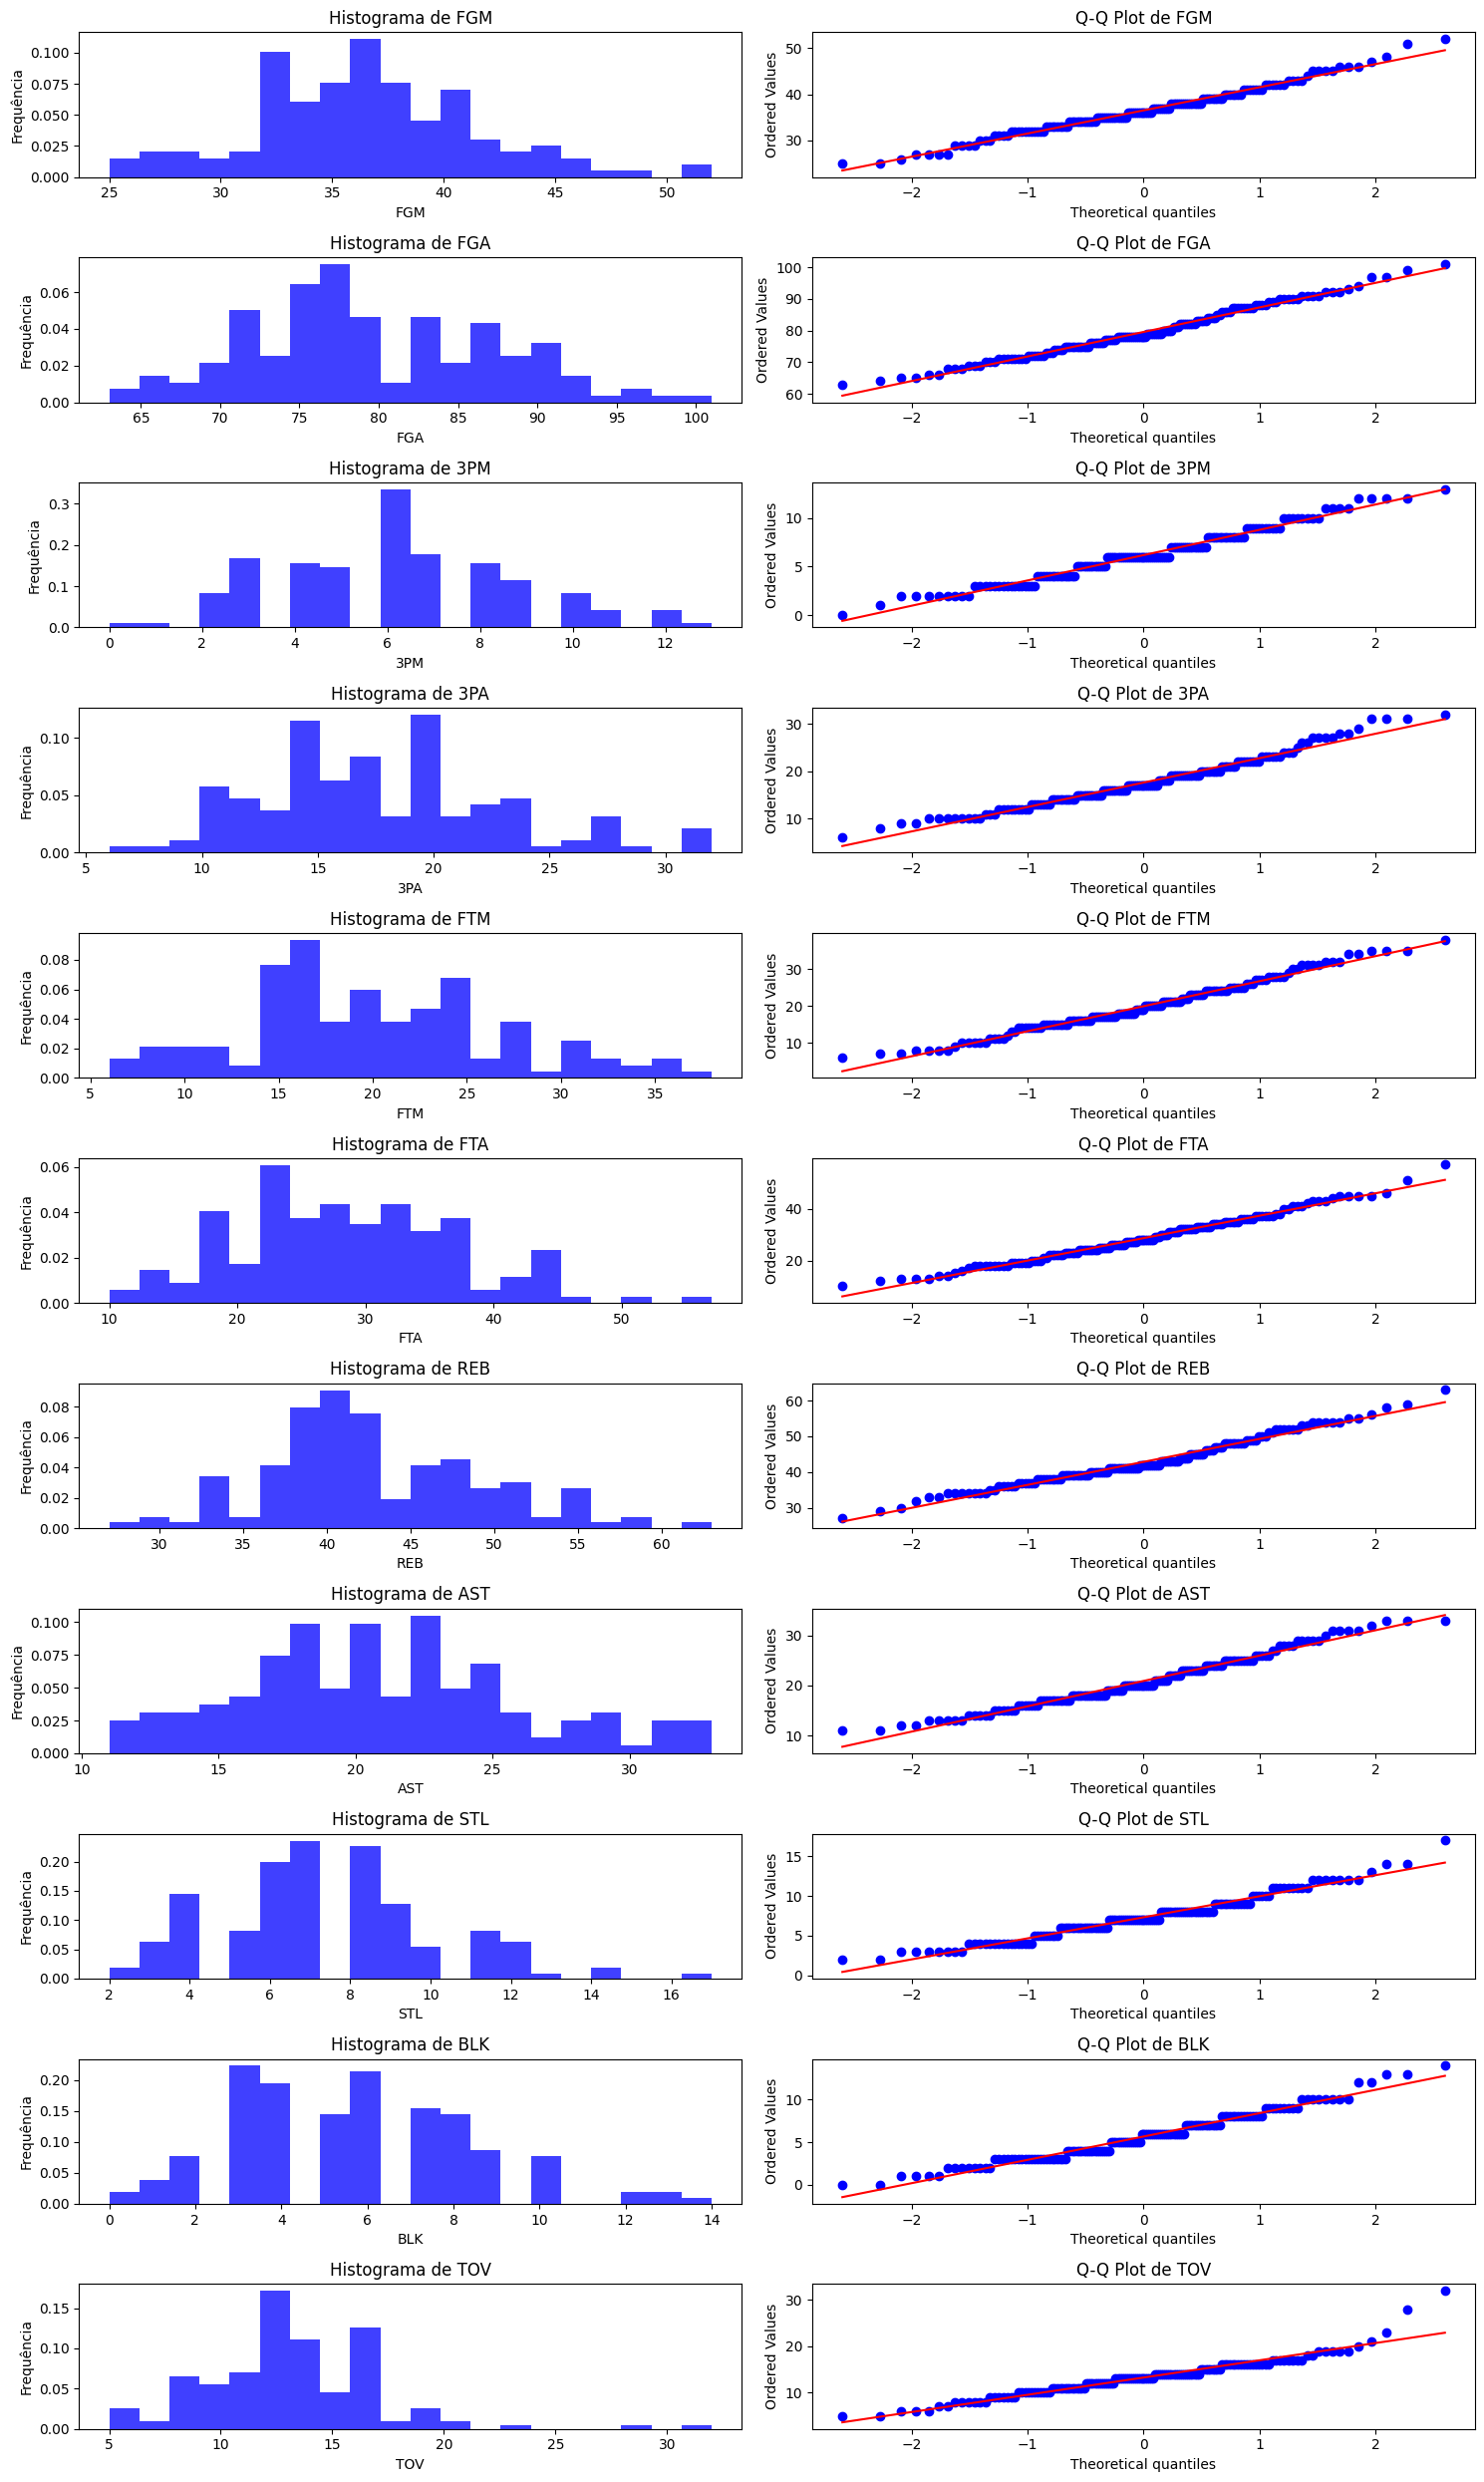

In [60]:
# Estatísticas a serem analisadas
estatisticas = ['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Configurações para subplot
num_rows = len(estatisticas)
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 25))

# Loop sobre as estatísticas
for i, estatistica in enumerate(estatisticas):
    # Dados da estatística ao longo da temporada
    data = lakers_merged_playoffs[estatistica]
    
    # Histograma
    axs[i, 0].hist(data, bins=20, density=True, alpha=0.75, color='b')
    axs[i, 0].set_title(f'Histograma de {estatistica}')
    axs[i, 0].set_xlabel(estatistica)
    axs[i, 0].set_ylabel('Frequência')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q Plot de {estatistica}')

# Ajustar layout
plt.tight_layout()
plt.show()


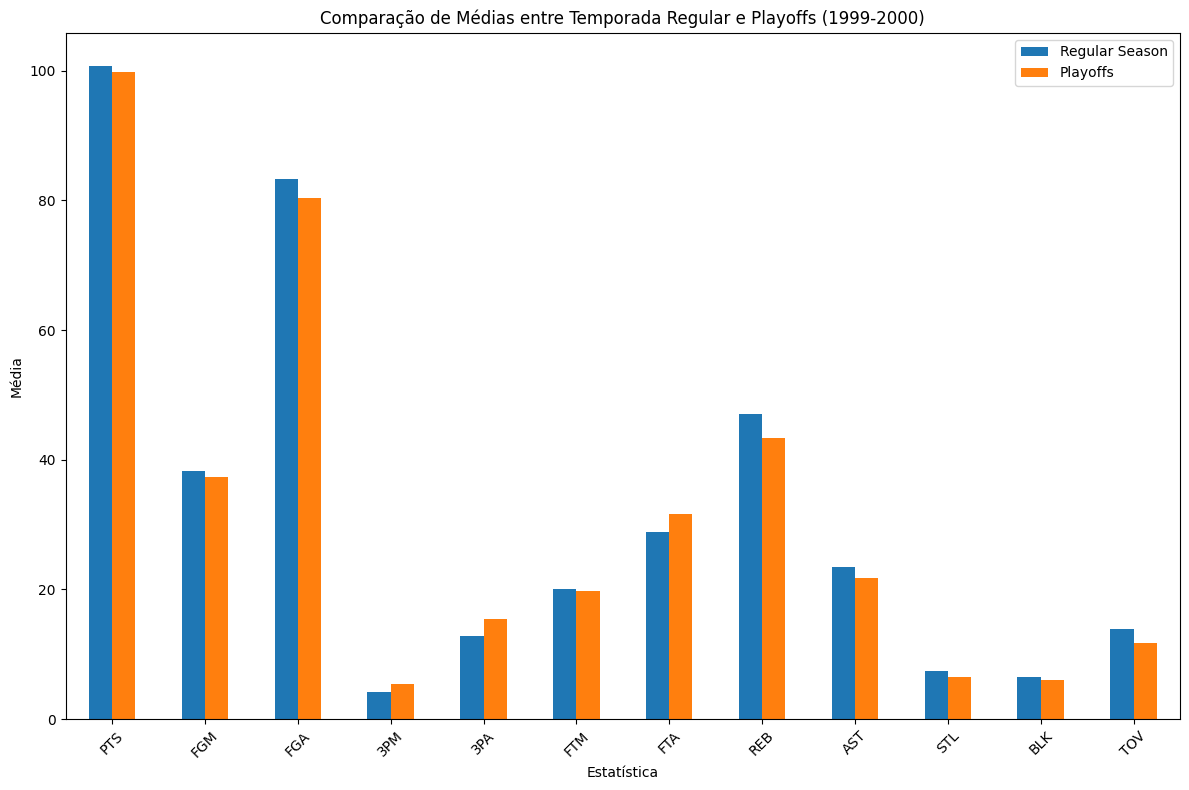

Diferenças percentuais entre médias (Playoffs vs Temporada Regular):
PTS    -1.026081
FGM    -2.374187
FGA    -3.568067
3PM    28.513650
3PA    20.883684
FTM    -2.059219
FTA     9.455787
REB    -7.794507
AST    -6.832945
STL   -12.178169
BLK    -6.529881
TOV   -16.094184
dtype: float64


In [61]:
# Estatísticas para análise
estatisticas = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# médias para a temporada regular
medias_regular = lakers_99_00[estatisticas].mean()

# médias para os playoffs
medias_playoffs = lakers_99_00_playoffs[estatisticas].mean()

# DataFrame para comparar as médias
comparacao = pd.DataFrame({
    'Regular Season': medias_regular,
    'Playoffs': medias_playoffs
})

# gráfico de barras para comparar as médias
plt.figure(figsize=(12, 8))
comparacao.plot(kind='bar', rot=45, ax=plt.gca())
plt.title('Comparação de Médias entre Temporada Regular e Playoffs (1999-2000)')
plt.ylabel('Média')
plt.xlabel('Estatística')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# diferenças percentuais entre médias
diferencas_percentuais = ((medias_playoffs - medias_regular) / medias_regular) * 100

# diferenças percentuais
print("Diferenças percentuais entre médias (Playoffs vs Temporada Regular):")
print(diferencas_percentuais)


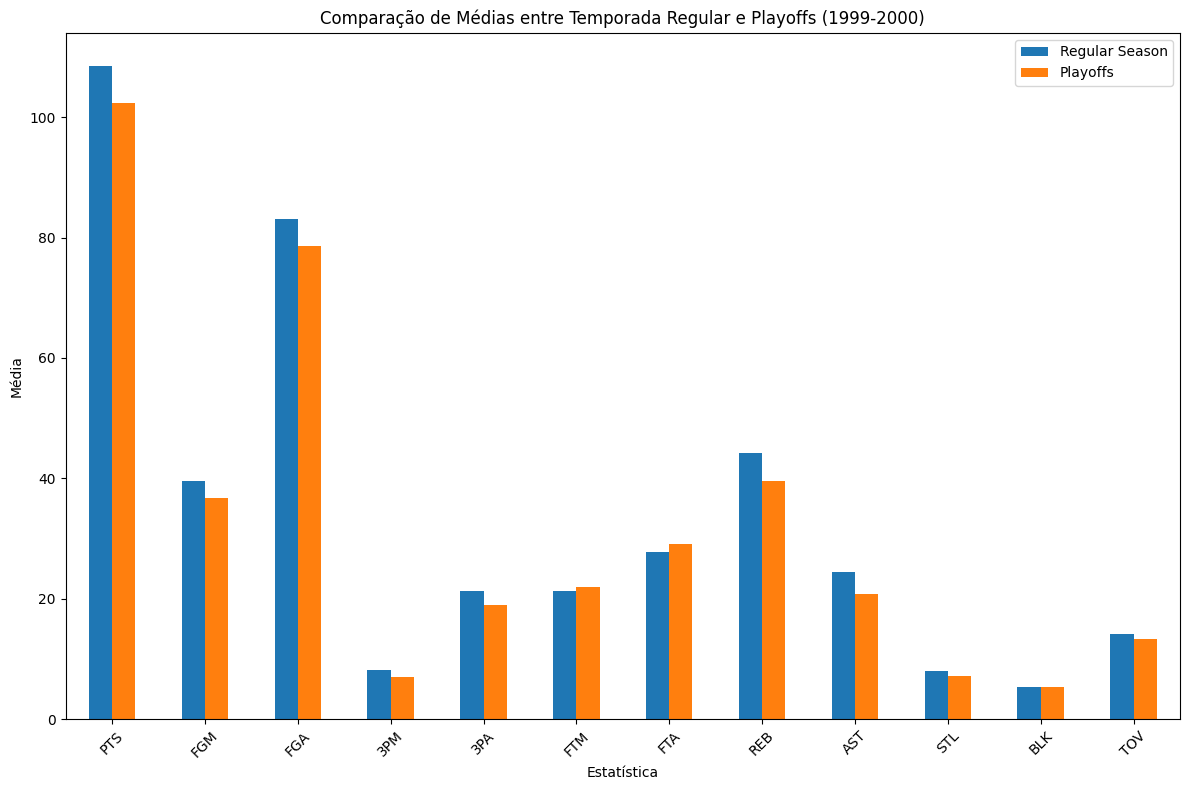

Diferenças percentuais entre médias (Playoffs vs Temporada Regular):
PTS    -5.670004
FGM    -7.189772
FGA    -5.444971
3PM   -13.882895
3PA   -11.245275
FTM     3.098238
FTA     5.273757
REB   -10.363062
AST   -15.003685
STL    -9.844182
BLK    -1.043705
TOV    -5.758774
dtype: float64


In [63]:
# Estatísticas para análise
estatisticas = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Calcular médias para a temporada regular
medias_regular = lakers_07_08[estatisticas].mean()

# Calcular médias para os playoffs
medias_playoffs = lakers_07_08_playoffs[estatisticas].mean()

# Criar um DataFrame para comparar as médias
comparacao = pd.DataFrame({
    'Regular Season': medias_regular,
    'Playoffs': medias_playoffs
})

# Plotar gráfico de barras para comparar as médias
plt.figure(figsize=(12, 8))
comparacao.plot(kind='bar', rot=45, ax=plt.gca())
plt.title('Comparação de Médias entre Temporada Regular e Playoffs (2007-2008)')
plt.ylabel('Média')
plt.xlabel('Estatística')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Calcular diferenças percentuais entre médias
diferencas_percentuais = ((medias_playoffs - medias_regular) / medias_regular) * 100

# Mostrar diferenças percentuais
print("Diferenças percentuais entre médias (Playoffs vs Temporada Regular):")
print(diferencas_percentuais)


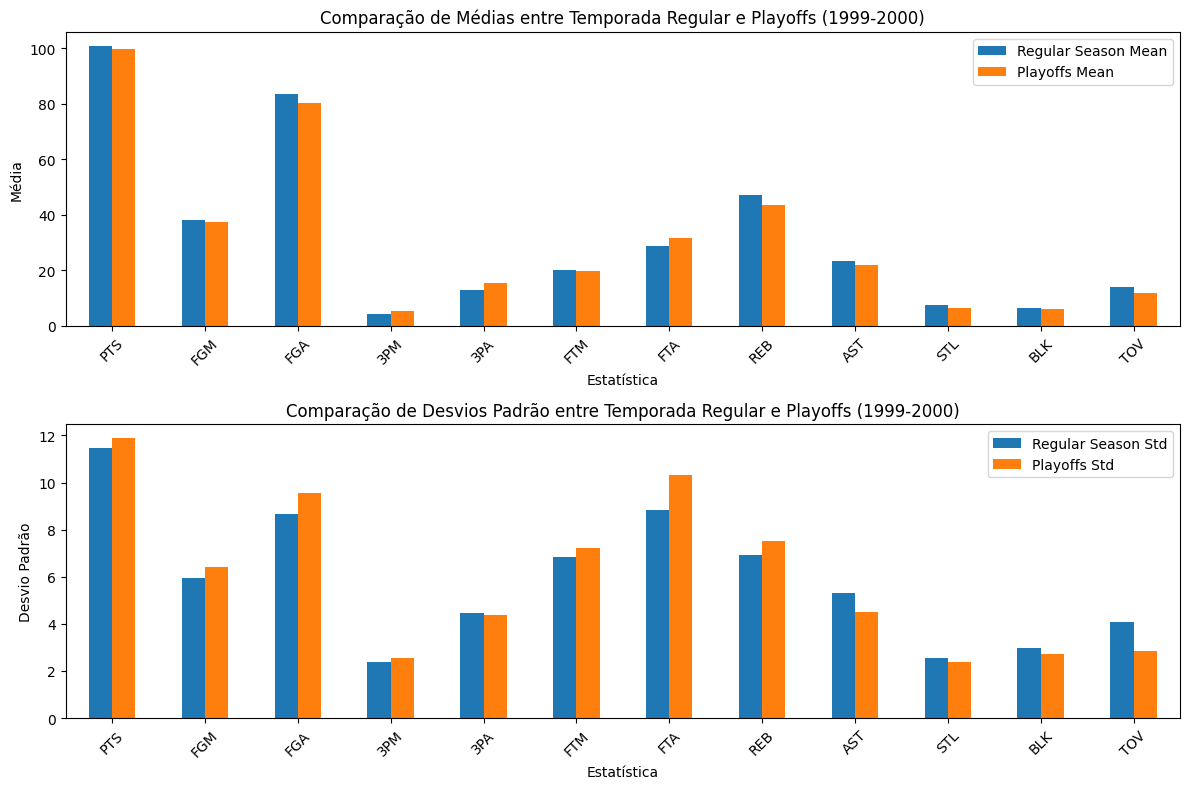

Diferenças percentuais entre médias (Playoffs vs Temporada Regular):
PTS    -1.026081
FGM    -2.374187
FGA    -3.568067
3PM    28.513650
3PA    20.883684
FTM    -2.059219
FTA     9.455787
REB    -7.794507
AST    -6.832945
STL   -12.178169
BLK    -6.529881
TOV   -16.094184
dtype: float64

Diferenças percentuais nos desvios padrão (Playoffs vs Temporada Regular):
PTS     3.849083
FGM     8.184850
FGA    10.230877
3PM     8.752584
3PA    -1.282349
FTM     5.505242
FTA    17.226714
REB     8.946933
AST   -14.977813
STL    -7.705035
BLK    -9.188641
TOV   -30.410165
dtype: float64


In [64]:
# Estatísticas para análise
estatisticas = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Calcular médias para a temporada regular e os playoffs
medias_regular = lakers_99_00[estatisticas].mean()
medias_playoffs = lakers_99_00_playoffs[estatisticas].mean()

# Calcular desvios padrão para a temporada regular e os playoffs
desvios_regular = lakers_99_00[estatisticas].std()
desvios_playoffs = lakers_99_00_playoffs[estatisticas].std()

# Criar um DataFrame para comparar médias e desvios padrão
comparacao = pd.DataFrame({
    'Regular Season Mean': medias_regular,
    'Playoffs Mean': medias_playoffs,
    'Regular Season Std': desvios_regular,
    'Playoffs Std': desvios_playoffs
})

# Plotar gráfico de barras para comparar as médias e desvios padrão
plt.figure(figsize=(12, 8))

# Subplot para as médias
plt.subplot(2, 1, 1)
comparacao[['Regular Season Mean', 'Playoffs Mean']].plot(kind='bar', rot=45, ax=plt.gca())
plt.title('Comparação de Médias entre Temporada Regular e Playoffs (1999-2000)')
plt.ylabel('Média')
plt.xlabel('Estatística')
plt.legend(loc='upper right')

# Subplot para os desvios padrão
plt.subplot(2, 1, 2)
comparacao[['Regular Season Std', 'Playoffs Std']].plot(kind='bar', rot=45, ax=plt.gca())
plt.title('Comparação de Desvios Padrão entre Temporada Regular e Playoffs (1999-2000)')
plt.ylabel('Desvio Padrão')
plt.xlabel('Estatística')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar as diferenças percentuais nas médias
print("Diferenças percentuais entre médias (Playoffs vs Temporada Regular):")
diferencas_percentuais = ((medias_playoffs - medias_regular) / medias_regular) * 100
print(diferencas_percentuais)

# Mostrar as diferenças percentuais nos desvios padrão
print("\nDiferenças percentuais nos desvios padrão (Playoffs vs Temporada Regular):")
diferencas_percentuais_std = ((desvios_playoffs - desvios_regular) / desvios_regular) * 100
print(diferencas_percentuais_std)
